In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
import scipy as sci
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_excel('World_development_mesurement.xlsx')
df

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage  \
0                        NaN               NaN       26998.0   
1                        NaN               NaN        7499.0   
2                        NaN               NaN        1983.0   
3                        NaN               NaN        1836.0   
4                        NaN               NaN           NaN   
...                      ...               ...           ...   
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health Exp % GDP Health Exp/Capita  ...  \
0         $54,790,058,957             0.035               $60  ...   
1          $9,129,594,819             0.034               $22  ...   
2          $2,359,122,303             0.043               $15  ...   
3          $5,788,311,645             0.047              $152  ...   
4          $2,610,959,139             0.051               $12  ...   
...                   ...               ...               ...  ...   
2699                  NaN               NaN               NaN  ...   
2700  $16,244,600,000,000             0.179            $8,895  ...   
2701      $50,004,354,667             0.089            $1,308  ...   
2702     $381,286,223,859             0.046              $593  ...   
2703                  NaN               NaN               NaN  ...   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
27

In [3]:
df.shape

(2704, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [5]:
df.describe()

Birth Rate  CO2 Emissions  Days to Start Business  Ease of Business  \
count  2585.000000   2.125000e+03             1718.000000        185.000000   
mean      0.022715   1.423071e+05               39.999418         94.875676   
std       0.011338   6.159288e+05               57.318588         54.791906   
min       0.007000   7.000000e+00                1.000000          1.000000   
25%       0.013000   1.360000e+03               13.000000         48.000000   
50%       0.020000   8.529000e+03               26.000000         94.000000   
75%       0.031000   5.910800e+04               45.000000        142.000000   
max       0.053000   8.286892e+06              694.000000        189.000000   

       Energy Usage  Health Exp % GDP  Hours to do Tax  Infant Mortality Rate  \
count  1.785000e+03       2395.000000      1416.000000            2444.000000   
mean   7.723684e+04          0.064170       302.068503               0.032813   
std    2.599239e+05          0.026325       273.299686               0.029968   
min    8.000000e+00          0.008000        12.000000               0.002000   
25%    3.737000e+03          0.046000       156.000000               0.009000   
50%    1.433800e+04          0.061000       239.000000               0.020000   
75%    4.185200e+04          0.079000       344.750000               0.053000   
max    2.727728e+06          0.225000      2600.000000               0.141000   

       Internet Usage  Lending Interest  Life Expectancy Female  \
count     2531.000000       1880.000000             2568.000000   
mean         0.239747          0.148103               71.159268   
std          0.260132          0.171829               10.708262   
min          0.000000          0.005000               39.000000   
25%          0.000000          0.080000               64.000000   
50%          0.100000          0.120000               75.000000   
75%          0.400000          0.173000               79.000000   
max          1.000000          4.965000               87.000000   

       Life Expectancy Male  Mobile Phone Usage  Number of Records  \
count           2568.000000         2537.000000             2704.0   
mean              66.461838            0.578124                1.0   
std                9.390217            0.474647                0.0   
min               37.000000            0.000000                1.0   
25%               61.000000            0.100000                1.0   
50%               69.000000            0.500000                1.0   
75%               73.250000            0.900000                1.0   
max               88.000000            2.900000                1.0   

       Population 0-14  Population 15-64  Population 65+  Population Total  \
count      2484.000000       2484.000000     2484.000000      2.704000e+03   
mean          0.303051          0.623481        0.073465      3.145729e+07   
std           0.106577          0.069660        0.049541      1.242894e+08   
min           0.118000          0.474000        0.003000      1.887600e+04   
25%           0.204750          0.559000        0.033000      8.783360e+05   
50%           0.299500          0.642500        0.052000      5.800324e+06   
75%           0.402000          0.676000        0.112000      2.014089e+07   
max           0.500000          0.858000        0.244000      1.350695e+09   

       Population Urban  
count       2678.000000  
mean           0.562953  
std            0.245897  
min            0.082000  
25%            0.356000  
50%            0.560000  
75%            0.765000  
max            1.000000

In [6]:
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [7]:
df['GDP']=df['GDP'].str.replace(',','')
df['GDP']=df['GDP'].str.replace('$','')
df['GDP']=df['GDP'].astype(float)

In [8]:
df['Business Tax Rate']=df['Business Tax Rate'].str.replace(',','')
df['Business Tax Rate']=df['Business Tax Rate'].str.replace('%','')
df['Business Tax Rate']=df['Business Tax Rate'].astype(float)

In [9]:
df['Health Exp/Capita']=df['Health Exp/Capita'].str.replace(',','')
df['Health Exp/Capita']=df['Health Exp/Capita'].str.replace('$','')
df['Health Exp/Capita']=df['Health Exp/Capita'].astype(float)

In [10]:
df['Tourism Inbound']=df['Tourism Inbound'].str.replace(',','')
df['Tourism Inbound']=df['Tourism Inbound'].str.replace('$','')
df['Tourism Inbound']=df['Tourism Inbound'].astype(float)

In [11]:
df['Tourism Outbound']=df['Tourism Outbound'].str.replace(',','')
df['Tourism Outbound']=df['Tourism Outbound'].str.replace('$','')
df['Tourism Outbound']=df['Tourism Outbound'].astype(float)

In [12]:
df

Birth Rate  Business Tax Rate  CO2 Emissions                   Country  \
0          0.020                NaN        87931.0                   Algeria   
1          0.050                NaN         9542.0                    Angola   
2          0.043                NaN         1617.0                     Benin   
3          0.027                NaN         4276.0                  Botswana   
4          0.046                NaN         1041.0              Burkina Faso   
...          ...                ...            ...                       ...   
2699         NaN                NaN            NaN  Turks and Caicos Islands   
2700       0.013               46.4            NaN             United States   
2701       0.015               41.9            NaN                   Uruguay   
2702       0.020               61.9            NaN             Venezuela, RB   
2703       0.011                NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                        NaN               NaN       26998.0  5.479006e+10   
1                        NaN               NaN        7499.0  9.129595e+09   
2                        NaN               NaN        1983.0  2.359122e+09   
3                        NaN               NaN        1836.0  5.788312e+09   
4                        NaN               NaN           NaN  2.610959e+09   
...                      ...               ...           ...           ...   
2699                     NaN               NaN           NaN           NaN   
2700                     5.0               4.0     2132446.0  1.624460e+13   
2701                     7.0              85.0           NaN  5.000435e+10   
2702                   144.0             180.0           NaN  3.812862e+11   
2703                     NaN               NaN           NaN           NaN   

      Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Male  \
0                0.035               60.0  ...                  67.0   
1                0.034               22.0  ...                  44.0   
2                0.043               15.0  ...                  53.0   
3                0.047              152.0  ...                  49.0   
4                0.051               12.0  ...                  49.0   
...                ...                ...  ...                   ...   
2699               NaN                NaN  ...                   NaN   
2700             0.179             8895.0  ...                  76.0   
2701             0.089             1308.0  ...                  74.0   
2702             0.046              593.0  ...                  72.0   
2703               NaN                NaN  ...                  76.0   

      Mobile Phone Usage  Number of Records  Population 0-14  \
0                    0.0                  1            0.342   
1                    0.0                  1            0.476   
2                    0.0                  1            0.454   
3                    0.1                  1            0.383   
4                    0.0                  1            0.468   
...                  ...                ...              ...   
2699                 NaN                  1              NaN   
2700                 1.0                  1            0.196   
2701                 1.5                  1            0.220   
2702                 1.0                  1            0.288   
2703                 NaN                  1            0.206   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0                0.619           0.039          31719449             0.599   
1                0.499           0.025          13924930             0.324   
2                0.517           0.029           6949366             0.383   
3                0.587           0.029           1755375             0.532   
4                0.505           0.028          11607944             0.178   
...   

In [13]:
for i in df.columns :
  if i!="Country":
    df[i] = df[i].apply(lambda x: re.sub("[$,%]","",x) if isinstance(x, str) and x is not None else x)
    df[i] = pd.to_numeric(df[i],errors='coerce')
    df[i]

In [14]:
# dropping number of records column why because all are '1' values
df1=df.drop("Number of Records",axis=1)
df1

Birth Rate  Business Tax Rate  CO2 Emissions                   Country  \
0          0.020                NaN        87931.0                   Algeria   
1          0.050                NaN         9542.0                    Angola   
2          0.043                NaN         1617.0                     Benin   
3          0.027                NaN         4276.0                  Botswana   
4          0.046                NaN         1041.0              Burkina Faso   
...          ...                ...            ...                       ...   
2699         NaN                NaN            NaN  Turks and Caicos Islands   
2700       0.013               46.4            NaN             United States   
2701       0.015               41.9            NaN                   Uruguay   
2702       0.020               61.9            NaN             Venezuela, RB   
2703       0.011                NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                        NaN               NaN       26998.0  5.479006e+10   
1                        NaN               NaN        7499.0  9.129595e+09   
2                        NaN               NaN        1983.0  2.359122e+09   
3                        NaN               NaN        1836.0  5.788312e+09   
4                        NaN               NaN           NaN  2.610959e+09   
...                      ...               ...           ...           ...   
2699                     NaN               NaN           NaN           NaN   
2700                     5.0               4.0     2132446.0  1.624460e+13   
2701                     7.0              85.0           NaN  5.000435e+10   
2702                   144.0             180.0           NaN  3.812862e+11   
2703                     NaN               NaN           NaN           NaN   

      Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Female  \
0                0.035               60.0  ...                    71.0   
1                0.034               22.0  ...                    47.0   
2                0.043               15.0  ...                    57.0   
3                0.047              152.0  ...                    52.0   
4                0.051               12.0  ...                    52.0   
...                ...                ...  ...                     ...   
2699               NaN                NaN  ...                     NaN   
2700             0.179             8895.0  ...                    81.0   
2701             0.089             1308.0  ...                    80.0   
2702             0.046              593.0  ...                    78.0   
2703               NaN                NaN  ...                    83.0   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                     67.0                 0.0            0.342   
1                     44.0                 0.0            0.476   
2                     53.0                 0.0            0.454   
3                     49.0                 0.1            0.383   
4                     49.0                 0.0            0.468   
...                    ...                 ...              ...   
2699                   NaN                 NaN              NaN   
2700                  76.0                 1.0            0.196   
2701                  74.0                 1.5            0.220   
2702                  72.0                 1.0            0.288   
2703                  76.0                 NaN            0.206   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0                0.619           0.039          31719449             0.599   
1                0.499           0.025          13924930             0.324   
2                0.517           0.029           6949366             0.383   
3                0.587           0.029           1755375             0.532   
4                0.505  

In [15]:
df2=df1.drop("Country",axis=1)
df2

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0          0.020                NaN        87931.0                     NaN   
1          0.050                NaN         9542.0                     NaN   
2          0.043                NaN         1617.0                     NaN   
3          0.027                NaN         4276.0                     NaN   
4          0.046                NaN         1041.0                     NaN   
...          ...                ...            ...                     ...   
2699         NaN                NaN            NaN                     NaN   
2700       0.013               46.4            NaN                     5.0   
2701       0.015               41.9            NaN                     7.0   
2702       0.020               61.9            NaN                   144.0   
2703       0.011                NaN            NaN                     NaN   

      Ease of Business  Energy Usage           GDP  Health Exp % GDP  \
0                  NaN       26998.0  5.479006e+10             0.035   
1                  NaN        7499.0  9.129595e+09             0.034   
2                  NaN        1983.0  2.359122e+09             0.043   
3                  NaN        1836.0  5.788312e+09             0.047   
4                  NaN           NaN  2.610959e+09             0.051   
...                ...           ...           ...               ...   
2699               NaN           NaN           NaN               NaN   
2700               4.0     2132446.0  1.624460e+13             0.179   
2701              85.0           NaN  5.000435e+10             0.089   
2702             180.0           NaN  3.812862e+11             0.046   
2703               NaN           NaN           NaN               NaN   

      Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Female  \
0                  60.0              NaN  ...                    71.0   
1                  22.0              NaN  ...                    47.0   
2                  15.0              NaN  ...                    57.0   
3                 152.0              NaN  ...                    52.0   
4                  12.0              NaN  ...                    52.0   
...                 ...              ...  ...                     ...   
2699                NaN              NaN  ...                     NaN   
2700             8895.0            175.0  ...                    81.0   
2701             1308.0            310.0  ...                    80.0   
2702              593.0            792.0  ...                    78.0   
2703                NaN              NaN  ...                    83.0   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                     67.0                 0.0            0.342   
1                     44.0                 0.0            0.476   
2                     53.0                 0.0            0.454   
3                     49.0                 0.1            0.383   
4                     49.0                 0.0            0.468   
...                    ...                 ...              ...   
2699                   NaN                 NaN              NaN   
2700                  76.0                 1.0            0.196   
2701                  74.0                 1.5            0.220   
2702                  72.0                 1.0            0.288   
2703                  76.0                 NaN            0.206   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0                0.619           0.039          31719449             0.599   
1                0.499           0.025          13924930             0.324   
2                0.517           0.029           6949366             0.383   
3                0.587           0.029           1755375             0.532   
4                0.505           0.028          11607944             0.178   
...                ...             ...               .

In [16]:
# copying the dataframe
df3=df2

In [17]:
df1[df1.duplicated()].shape

(0, 24)

In [18]:
df1[df1.duplicated()]

Empty DataFrame
Columns: [Birth Rate, Business Tax Rate, CO2 Emissions, Country, Days to Start Business, Ease of Business, Energy Usage, GDP, Health Exp % GDP, Health Exp/Capita, Hours to do Tax, Infant Mortality Rate, Internet Usage, Lending Interest, Life Expectancy Female, Life Expectancy Male, Mobile Phone Usage, Population 0-14, Population 15-64, Population 65+, Population Total, Population Urban, Tourism Inbound, Tourism Outbound]
Index: []

[0 rows x 24 columns]

In [19]:
df3['Birth Rate']=df3['Birth Rate'].fillna(df3['Birth Rate'].mean())
df3['Business Tax Rate']=df3['Business Tax Rate'].fillna(df3['Business Tax Rate'].mean())
df3['CO2 Emissions']=df3['CO2 Emissions'].fillna(df3['CO2 Emissions'].mean())
df3['Days to Start Business']=df3['Days to Start Business'].fillna(df3['Days to Start Business'].mean())
df3['Ease of Business']=df3['Ease of Business'].fillna(df3['Ease of Business'].mean())
df3['Energy Usage']=df3['Energy Usage'].fillna(df3['Energy Usage'].mean())
df3['GDP']=df3['GDP'].fillna(df3['GDP'].mean())
df3['Health Exp % GDP']=df3['Health Exp % GDP'].fillna(df3['Health Exp % GDP'].mean())
df3['Health Exp/Capita']=df3['Health Exp/Capita'].fillna(df3['Health Exp/Capita'].mean())
df3['Hours to do Tax']=df3['Hours to do Tax'].fillna(df3['Hours to do Tax'].mean())
df3['Infant Mortality Rate']=df3['Infant Mortality Rate'].fillna(df3['Infant Mortality Rate'].mean())
df3['Internet Usage']=df3['Internet Usage'].fillna(df3['Internet Usage'].mean())
df3['Lending Interest']=df3['Lending Interest'].fillna(df3['Lending Interest'].mean())
df3['Life Expectancy Female']=df3['Life Expectancy Female'].fillna(df3['Life Expectancy Female'].mean())
df3['Life Expectancy Male']=df3['Life Expectancy Male'].fillna(df3['Life Expectancy Male'].mean())
df3['Mobile Phone Usage']=df3['Mobile Phone Usage'].fillna(df3['Mobile Phone Usage'].mean())
df3['Population 0-14']=df3['Population 0-14'].fillna(df3['Population 0-14'].mean())
df3['Population 15-64']=df3['Population 15-64'].fillna(df3['Population 15-64'].mean())
df3['Population 65+']=df3['Population 65+'].fillna(df3['Population 65+'].mean())
df3['Population Total']=df3['Population Total'].fillna(df3['Population Total'].mean())
df3['Population Urban']=df3['Population Urban'].fillna(df3['Population Urban'].mean())
df3['Tourism Inbound']=df3['Tourism Inbound'].fillna(df3['Tourism Inbound'].mean())
df3['Tourism Outbound']=df3['Tourism Outbound'].fillna(df3['Tourism Outbound'].mean())
df3

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0       0.020000          48.966901   87931.000000               39.999418   
1       0.050000          48.966901    9542.000000               39.999418   
2       0.043000          48.966901    1617.000000               39.999418   
3       0.027000          48.966901    4276.000000               39.999418   
4       0.046000          48.966901    1041.000000               39.999418   
...          ...                ...            ...                     ...   
2699    0.022715          48.966901  142307.107765               39.999418   
2700    0.013000          46.400000  142307.107765                5.000000   
2701    0.015000          41.900000  142307.107765                7.000000   
2702    0.020000          61.900000  142307.107765              144.000000   
2703    0.011000          48.966901  142307.107765               39.999418   

      Ease of Business  Energy Usage           GDP  Health Exp % GDP  \
0            94.875676  2.699800e+04  5.479006e+10           0.03500   
1            94.875676  7.499000e+03  9.129595e+09           0.03400   
2            94.875676  1.983000e+03  2.359122e+09           0.04300   
3            94.875676  1.836000e+03  5.788312e+09           0.04700   
4            94.875676  7.723684e+04  2.610959e+09           0.05100   
...                ...           ...           ...               ...   
2699         94.875676  7.723684e+04  2.638540e+11           0.06417   
2700          4.000000  2.132446e+06  1.624460e+13           0.17900   
2701         85.000000  7.723684e+04  5.000435e+10           0.08900   
2702        180.000000  7.723684e+04  3.812862e+11           0.04600   
2703         94.875676  7.723684e+04  2.638540e+11           0.06417   

      Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Female  \
0             60.000000       302.068503  ...               71.000000   
1             22.000000       302.068503  ...               47.000000   
2             15.000000       302.068503  ...               57.000000   
3            152.000000       302.068503  ...               52.000000   
4             12.000000       302.068503  ...               52.000000   
...                 ...              ...  ...                     ...   
2699         801.397077       302.068503  ...               71.159268   
2700        8895.000000       175.000000  ...               81.000000   
2701        1308.000000       310.000000  ...               80.000000   
2702         593.000000       792.000000  ...               78.000000   
2703         801.397077       302.068503  ...               83.000000   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                67.000000            0.000000         0.342000   
1                44.000000            0.000000         0.476000   
2                53.000000            0.000000         0.454000   
3                49.000000            0.100000         0.383000   
4                49.000000            0.000000         0.468000   
...                    ...                 ...              ...   
2699             66.461838            0.578124         0.303051   
2700             76.000000            1.000000         0.196000   
2701             74.000000            1.500000         0.220000   
2702             72.000000            1.000000         0.288000   
2703             76.000000            0.578124         0.206000   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0             0.619000        0.039000          31719449             0.599   
1             0.499000        0.025000          13924930             0.324   
2             0.517000        0.029000           6949366             0.383   
3             0.587000        0.029000           1755375             0.532   
4             0.505000        0.028000          11607944             0.178   
...                ...             ...               .

In [20]:
df3.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

In [21]:
# imputation of null values by KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)
imputed_df = pd.DataFrame(knn_imputer.fit_transform(df2),columns=df2.columns)
imputed_df.head() 

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0       0.020          48.966901        87931.0               39.999418   
1       0.050          48.966901         9542.0               39.999418   
2       0.043          48.966901         1617.0               39.999418   
3       0.027          48.966901         4276.0               39.999418   
4       0.046          48.966901         1041.0               39.999418   

   Ease of Business  Energy Usage           GDP  Health Exp % GDP  \
0         94.875676  26998.000000  5.479006e+10             0.035   
1         94.875676   7499.000000  9.129595e+09             0.034   
2         94.875676   1983.000000  2.359122e+09             0.043   
3         94.875676   1836.000000  5.788312e+09             0.047   
4         94.875676  77236.840896  2.610959e+09             0.051   

   Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Female  \
0               60.0       302.068503  ...                    71.0   
1               22.0       302.068503  ...                    47.0   
2               15.0       302.068503  ...                    57.0   
3              152.0       302.068503  ...                    52.0   
4               12.0       302.068503  ...                    52.0   

   Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                  67.0                 0.0            0.342   
1                  44.0                 0.0            0.476   
2                  53.0                 0.0            0.454   
3                  49.0                 0.1            0.383   
4                  49.0                 0.0            0.468   

   Population 15-64  Population 65+  Population Total  Population Urban  \
0             0.619           0.039        31719449.0             0.599   
1             0.499           0.025        13924930.0             0.324   
2             0.517           0.029         6949366.0             0.383   
3             0.587           0.029         1755375.0             0.532   
4             0.505           0.028        11607944.0             0.178   

   Tourism Inbound  Tourism Outbound  
0      102000000.0       193000000.0  
1       34000000.0       146000000.0  
2       77000000.0        50000000.0  
3      227000000.0       209000000.0  
4       23000000.0        30000000.0  

[5 rows x 23 columns]

In [22]:
imputed_df.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

In [23]:
# To check unique countries
len(df["Country"].unique())

208

In [24]:
df4=pd.concat([df["Country"], imputed_df], axis=1)
df4

Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0                      Algeria    0.020000          48.966901   87931.000000   
1                       Angola    0.050000          48.966901    9542.000000   
2                        Benin    0.043000          48.966901    1617.000000   
3                     Botswana    0.027000          48.966901    4276.000000   
4                 Burkina Faso    0.046000          48.966901    1041.000000   
...                        ...         ...                ...            ...   
2699  Turks and Caicos Islands    0.022715          48.966901  142307.107765   
2700             United States    0.013000          46.400000  142307.107765   
2701                   Uruguay    0.015000          41.900000  142307.107765   
2702             Venezuela, RB    0.020000          61.900000  142307.107765   
2703     Virgin Islands (U.S.)    0.011000          48.966901  142307.107765   

      Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                  39.999418         94.875676  2.699800e+04  5.479006e+10   
1                  39.999418         94.875676  7.499000e+03  9.129595e+09   
2                  39.999418         94.875676  1.983000e+03  2.359122e+09   
3                  39.999418         94.875676  1.836000e+03  5.788312e+09   
4                  39.999418         94.875676  7.723684e+04  2.610959e+09   
...                      ...               ...           ...           ...   
2699               39.999418         94.875676  7.723684e+04  2.638540e+11   
2700                5.000000          4.000000  2.132446e+06  1.624460e+13   
2701                7.000000         85.000000  7.723684e+04  5.000435e+10   
2702              144.000000        180.000000  7.723684e+04  3.812862e+11   
2703               39.999418         94.875676  7.723684e+04  2.638540e+11   

      Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Female  \
0              0.03500          60.000000  ...               71.000000   
1              0.03400          22.000000  ...               47.000000   
2              0.04300          15.000000  ...               57.000000   
3              0.04700         152.000000  ...               52.000000   
4              0.05100          12.000000  ...               52.000000   
...                ...                ...  ...                     ...   
2699           0.06417         801.397077  ...               71.159268   
2700           0.17900        8895.000000  ...               81.000000   
2701           0.08900        1308.000000  ...               80.000000   
2702           0.04600         593.000000  ...               78.000000   
2703           0.06417         801.397077  ...               83.000000   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                67.000000            0.000000         0.342000   
1                44.000000            0.000000         0.476000   
2                53.000000            0.000000         0.454000   
3                49.000000            0.100000         0.383000   
4                49.000000            0.000000         0.468000   
...                    ...                 ...              ...   
2699             66.461838            0.578124         0.303051   
2700             76.000000            1.000000         0.196000   
2701             74.000000            1.500000         0.220000   
2702             72.000000            1.000000         0.288000   
2703             76.000000            0.578124         0.206000   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0             0.619000        0.039000        31719449.0             0.599   
1             0.499000        0.025000        13924930.0             0.324   
2             0.517000        0.029000         6949366.0             0.383   
3             0.587000        0.029000         1755375.0             0.532   
4             0.505000        0.028000   

In [25]:
# here we group the country by mean giving more weight to recent value or recent year
weight = [0.1,0.2,0.3,0.4,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.92]
weighted_mean = lambda x : np.average(x, weights=weight)
df5=df4.groupby('Country')[[i for i in df4.columns if i!='Country']].agg(weighted_mean).reset_index()
df5

Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0              Afghanistan    0.041167          38.777230   36238.785676   
1                  Albania    0.013815          42.685835   36847.038609   
2                  Algeria    0.023005          68.658846  116654.939522   
3           American Samoa    0.022243          48.966901  142307.107765   
4                  Andorra    0.011824          48.966901   34178.270682   
..                     ...         ...                ...            ...   
203                Vietnam    0.016652          40.237464  119249.796106   
204  Virgin Islands (U.S.)    0.012532          48.966901  142307.107765   
205            Yemen, Rep.    0.033784          55.993397   49442.371073   
206                 Zambia    0.043580          21.572015   35358.577071   
207               Zimbabwe    0.032000          42.700176   41348.720487   

     Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                 12.136821        103.886677  77236.840896  1.485839e+10   
1                 21.212471         93.331266  11086.126939  1.034689e+10   
2                 26.173357        101.607668  41165.214293  1.405384e+11   
3                 39.999418         94.875676  77236.840896  2.638540e+11   
4                 39.999418         94.875676  77236.840896  1.208240e+11   
..                      ...               ...           ...           ...   
203               41.477138         95.250432  51213.721463  9.368429e+10   
204               39.999418         94.875676  77236.840896  2.638540e+11   
205               37.066447         98.968815  15408.199951  2.424514e+10   
206               25.735287         94.290849  15902.535023  1.267078e+10   
207               90.104257        103.646781  17417.613250  7.695948e+09   

     Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Female  \
0            0.090003          63.988152  ...               59.574967   
1            0.060821         195.614081  ...               79.634941   
2            0.039868         160.388527  ...               71.846154   
3            0.064170         801.397077  ...               71.159268   
4            0.065471        2677.371578  ...               71.159268   
..                ...                ...  ...                     ...   
203          0.063236          62.977836  ...               79.791395   
204          0.064170         801.397077  ...               82.093872   
205          0.049870          56.032595  ...               63.374185   
206          0.064192          63.177314  ...               51.985658   
207          0.064170         801.397077  ...               49.404172   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0               57.096480            0.330174         0.488309   
1               73.406780            0.701043         0.246077   
2               68.628422            0.659061         0.282638   
3               66.461838            0.465062         0.303051   
4               66.461838            0.760887         0.303051   
..                    ...                 ...              ...   
203             70.374185            0.767927         0.253576   
204             75.843546            0.569772         0.216828   
205             60.722295            0.298175         0.437130   
206             49.986962            0.293872         0.467417   
207             49.392438            0.323077         0.412711   

     Population 15-64  Population 65+  Population Total  Population Urban  \
0            0.490503        0.021110      2.665963e+07          0.238527   
1            0.660778        0.093177      2.918560e+06          0.495823   
2            0.671888        0.045462      3.565502e+07          0.657351   
3            0.623481        0.073465      5.710064e+04          0.878381   
4            0.623481        0.073465      7.843177e+04          0.889842   
..                ...             ...            

In [26]:
df5.shape

(208, 24)

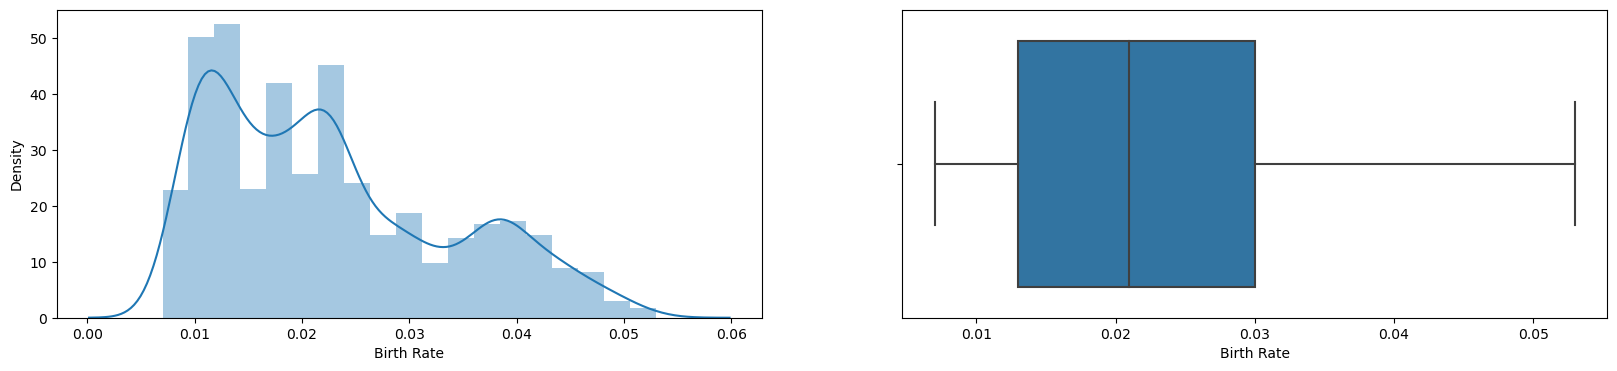

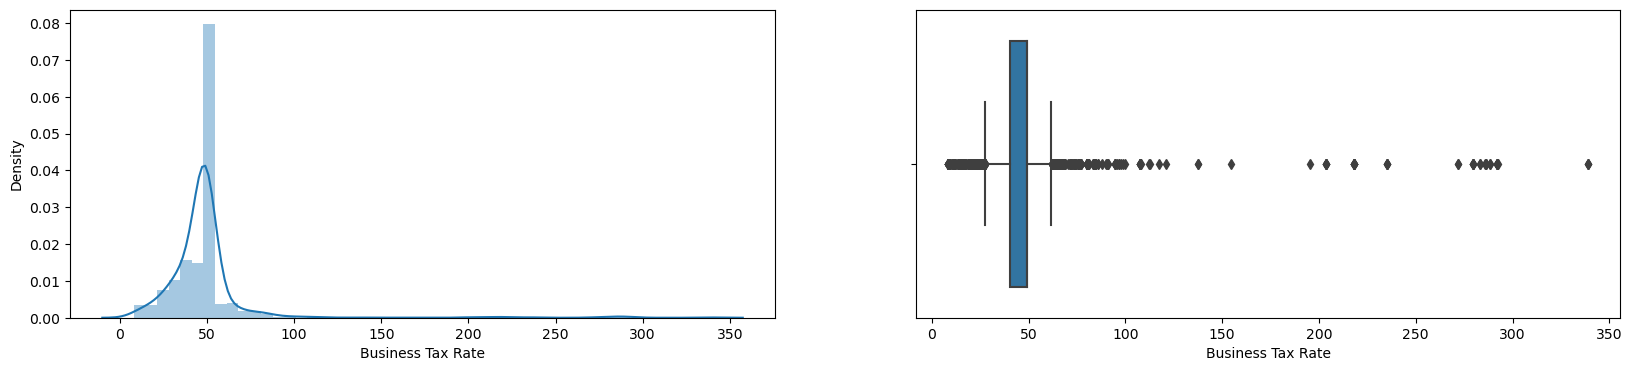

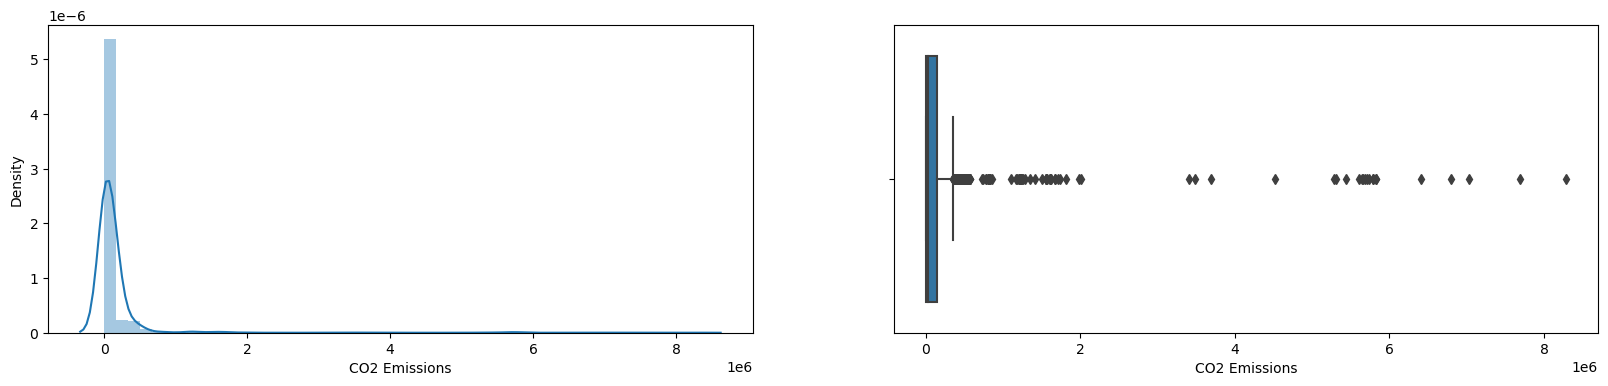

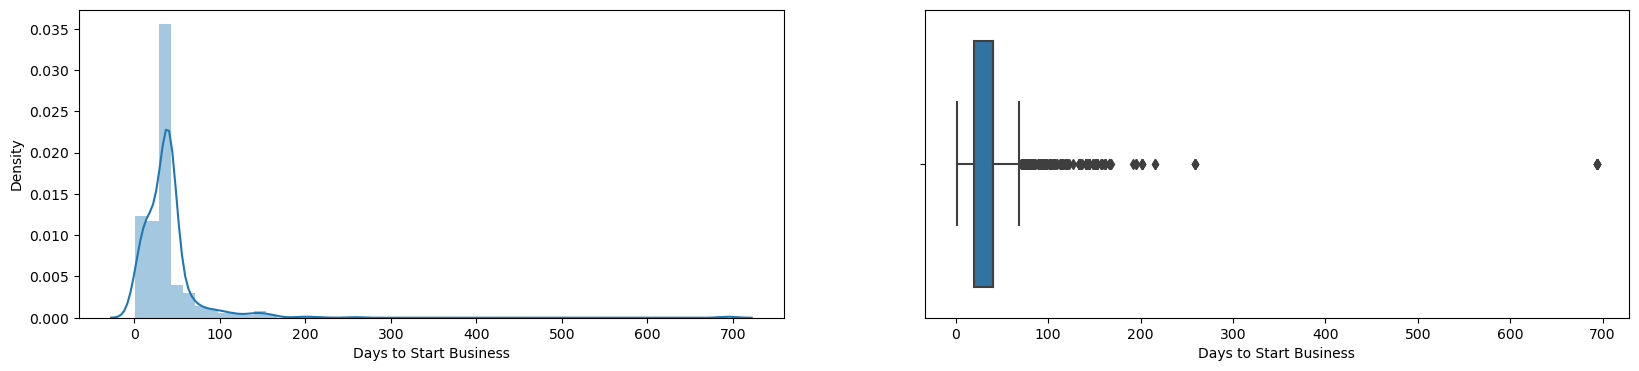

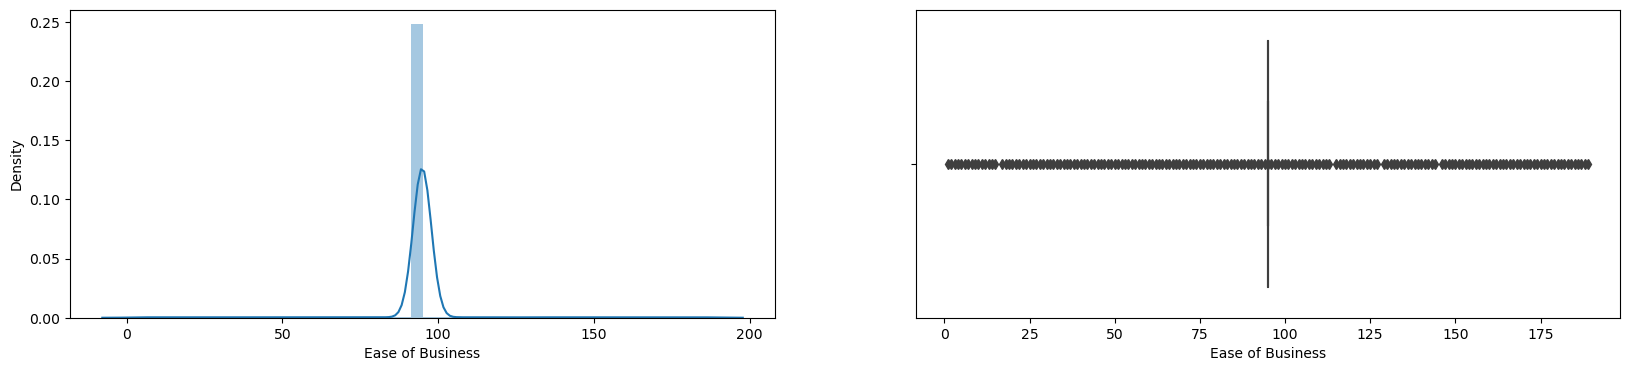

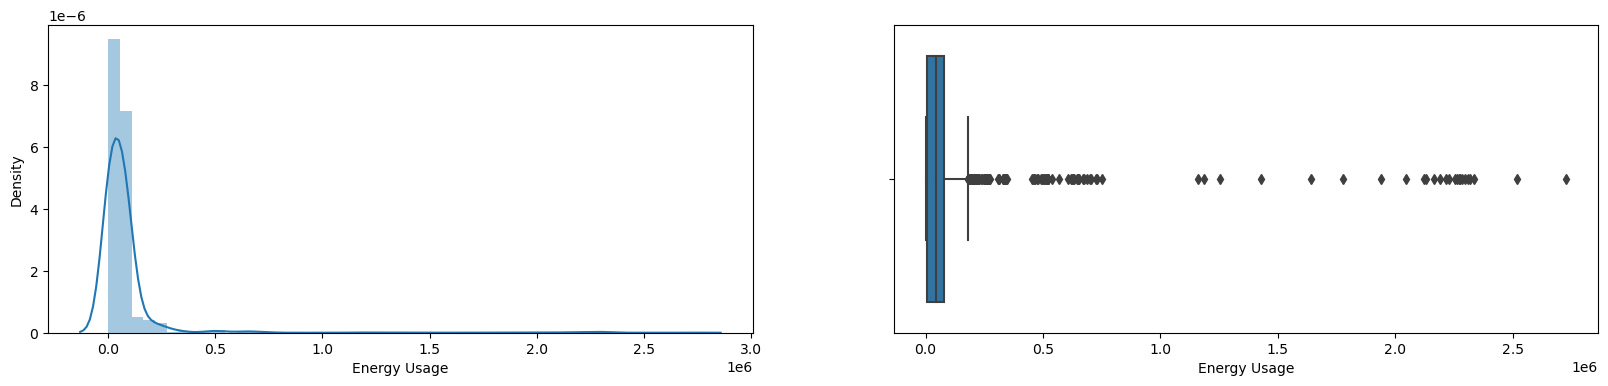

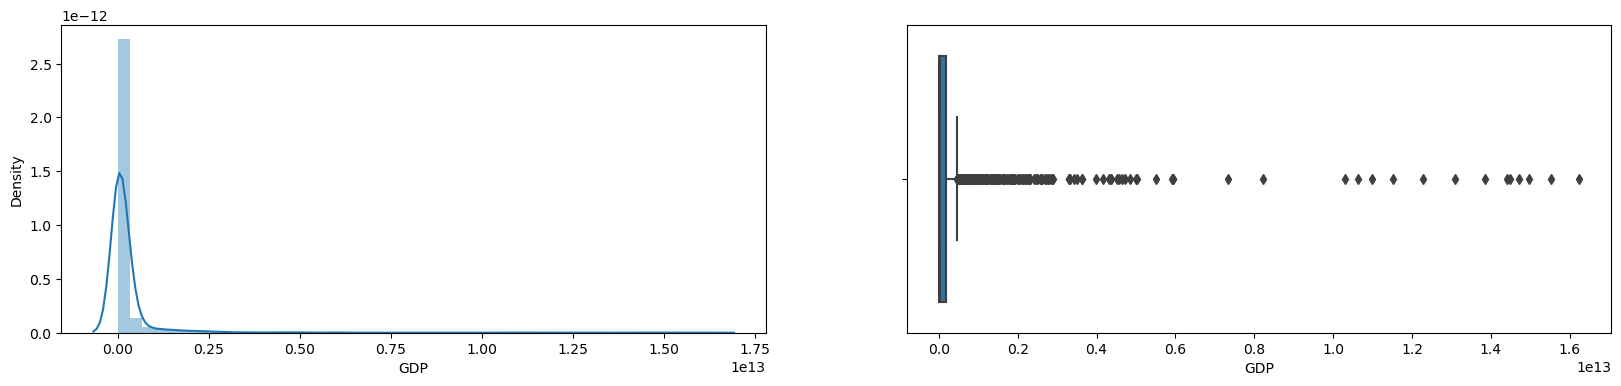

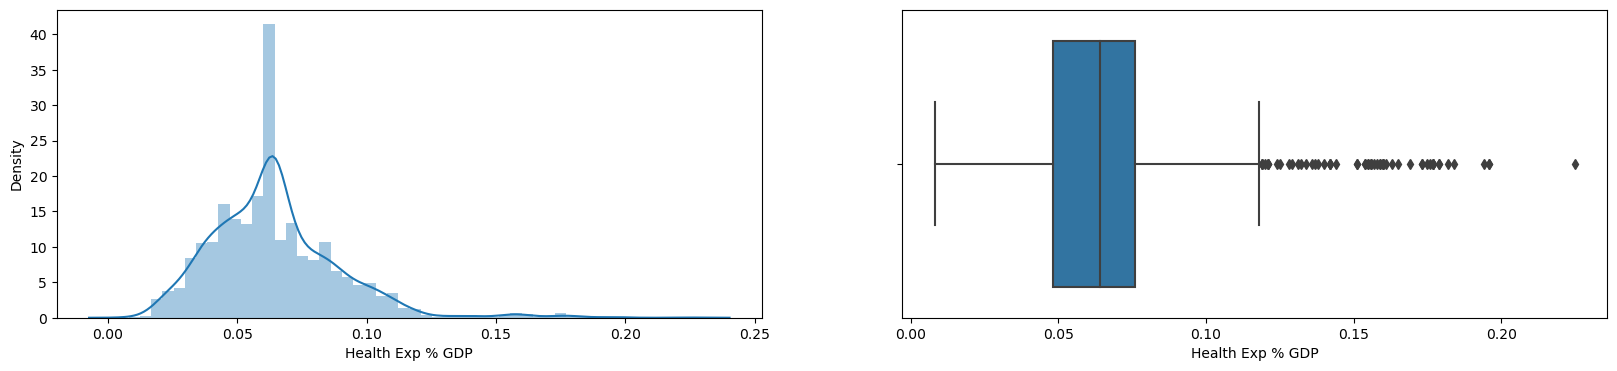

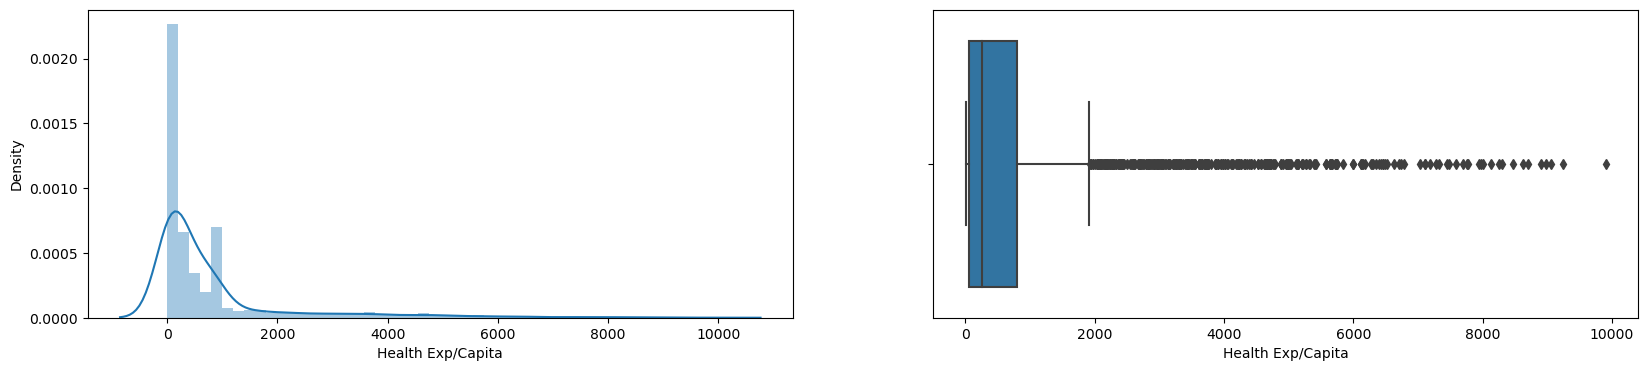

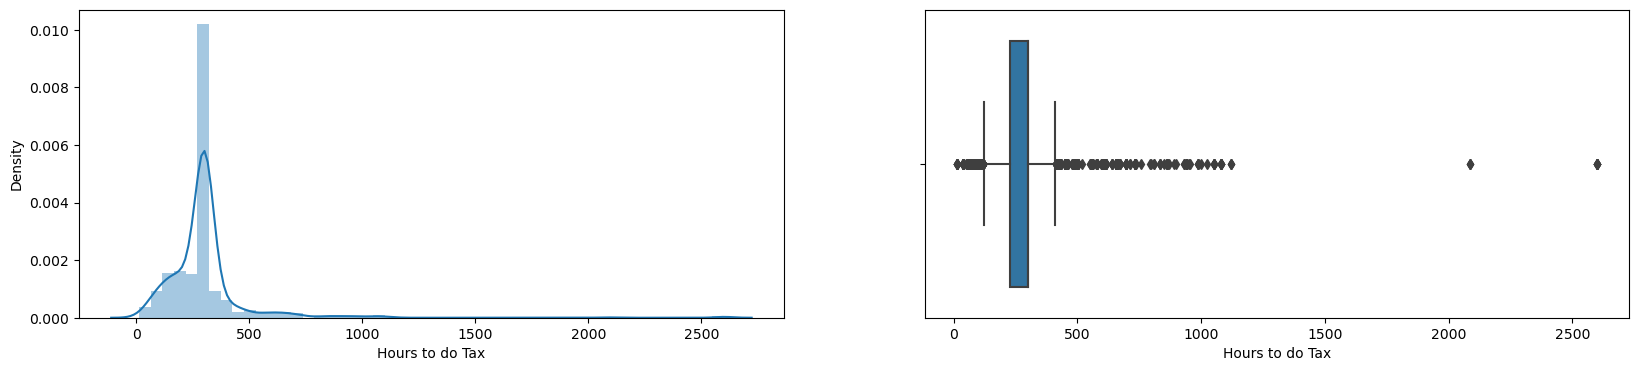

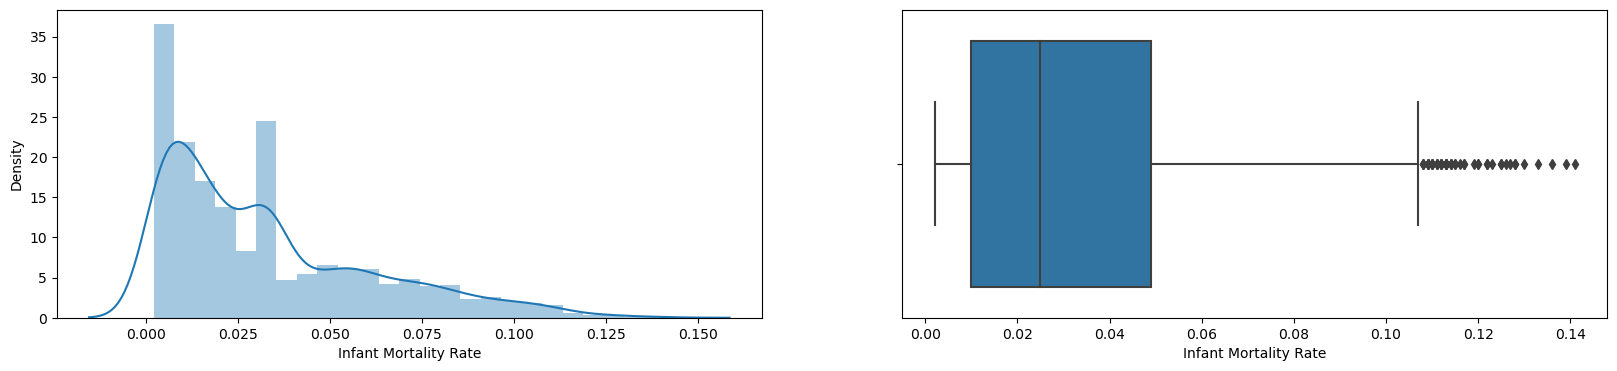

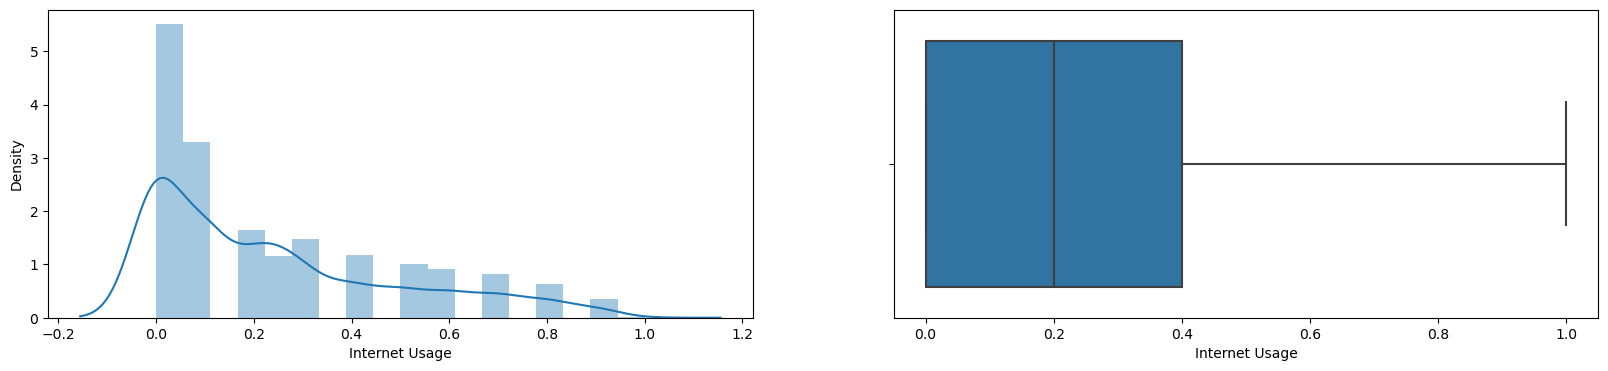

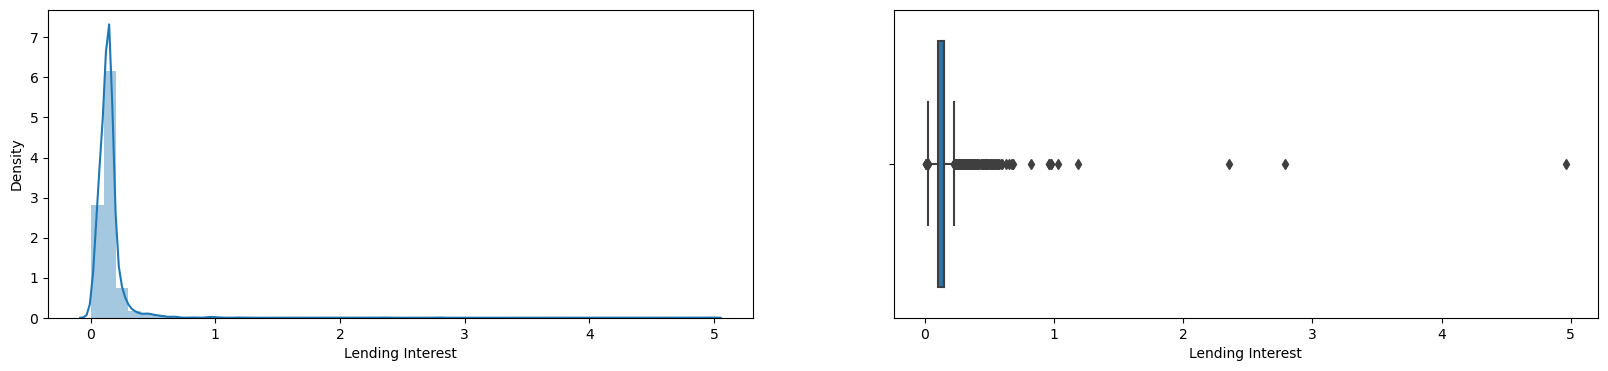

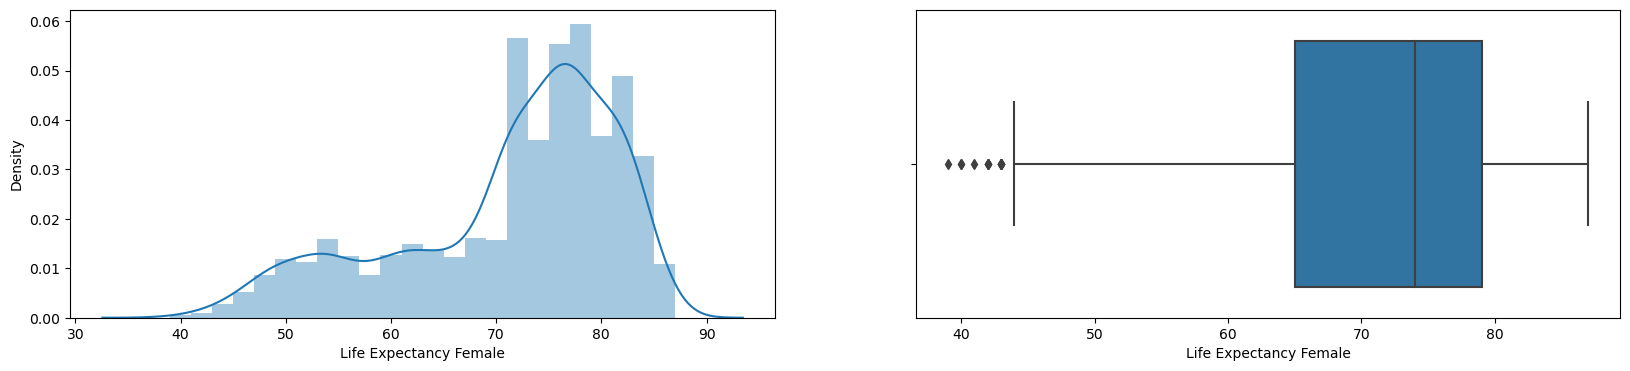

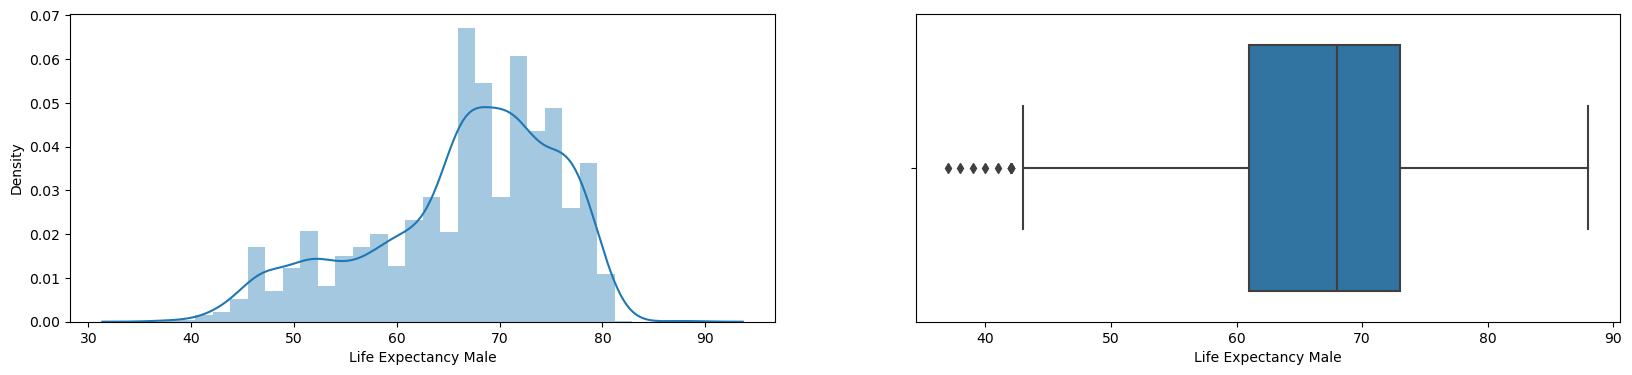

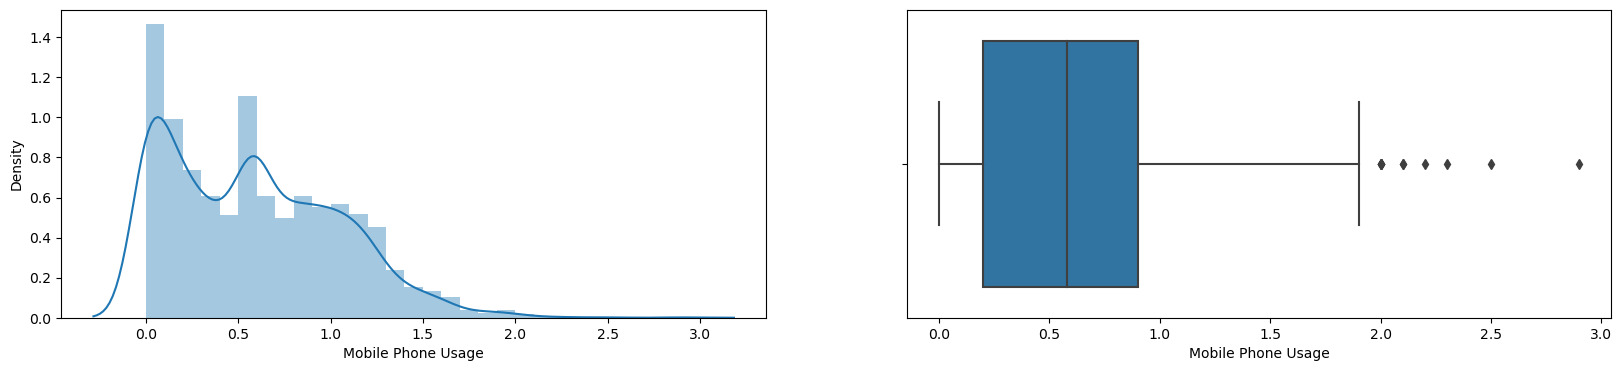

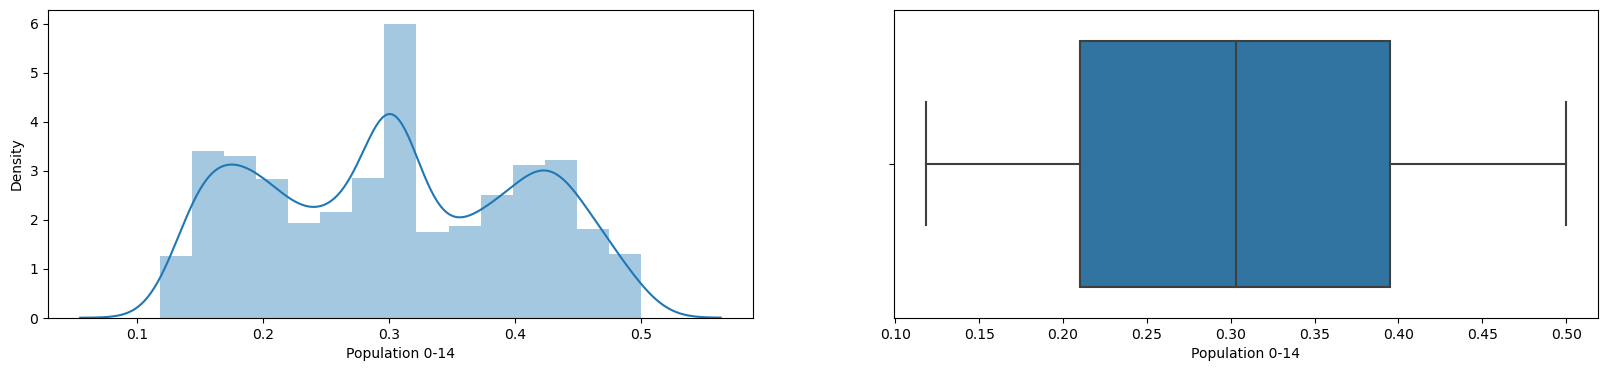

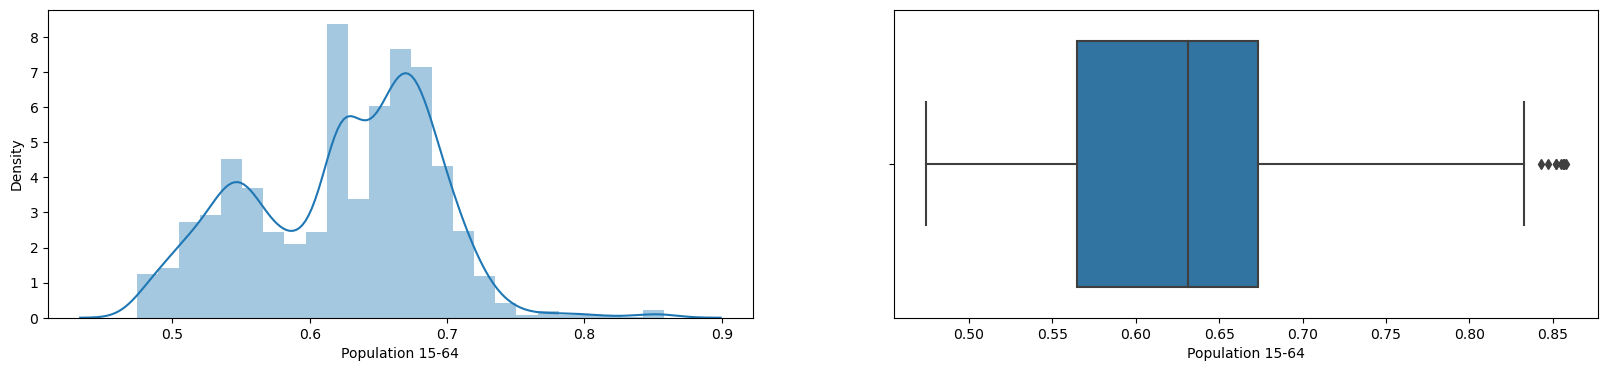

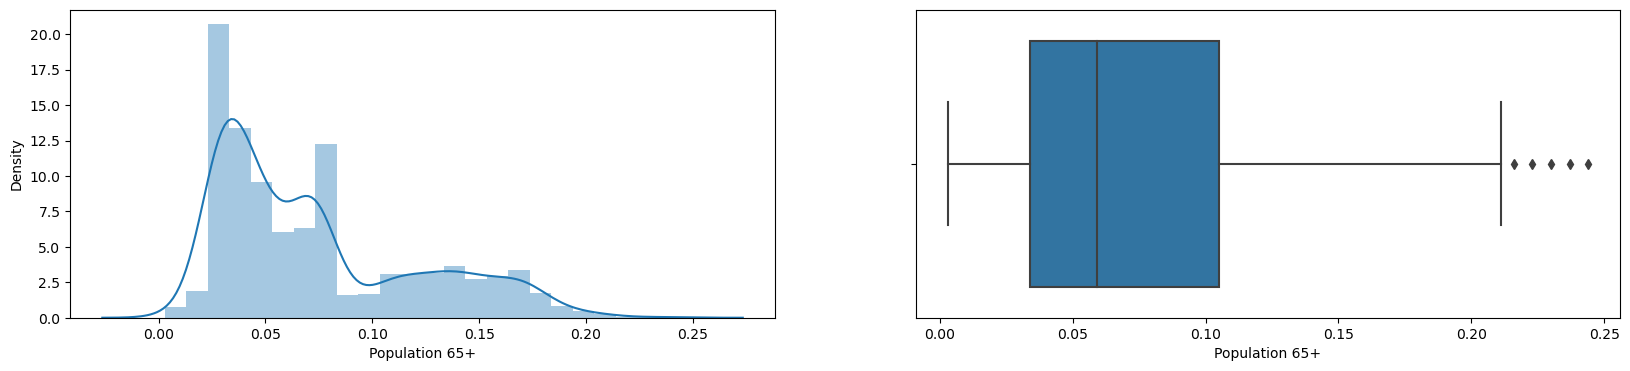

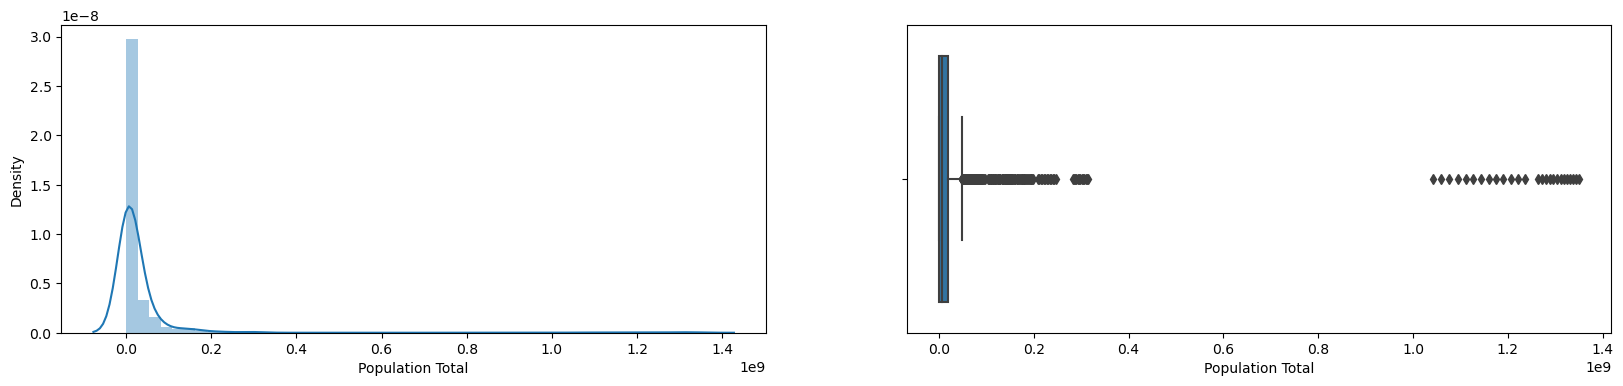

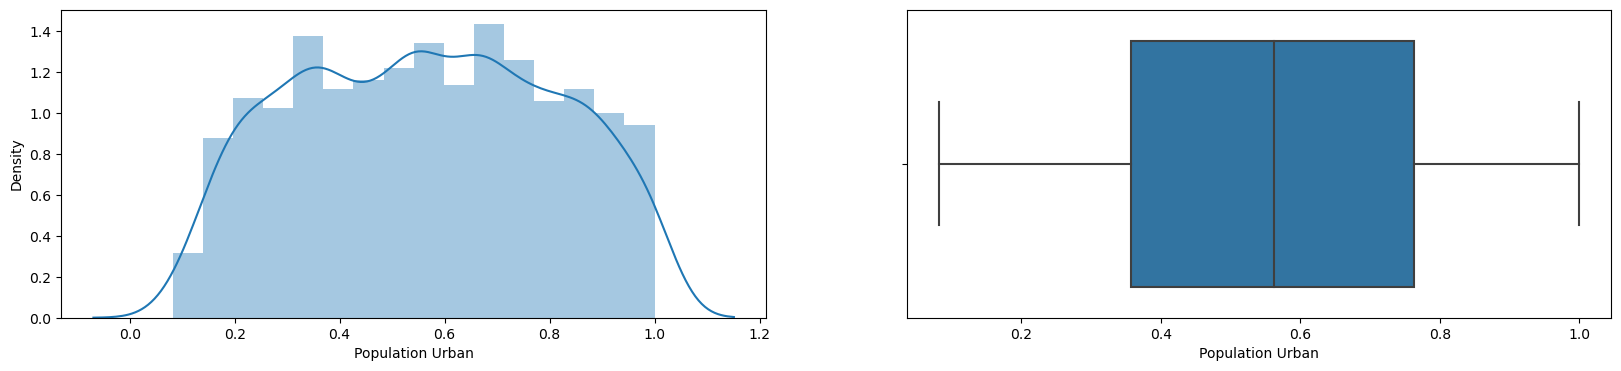

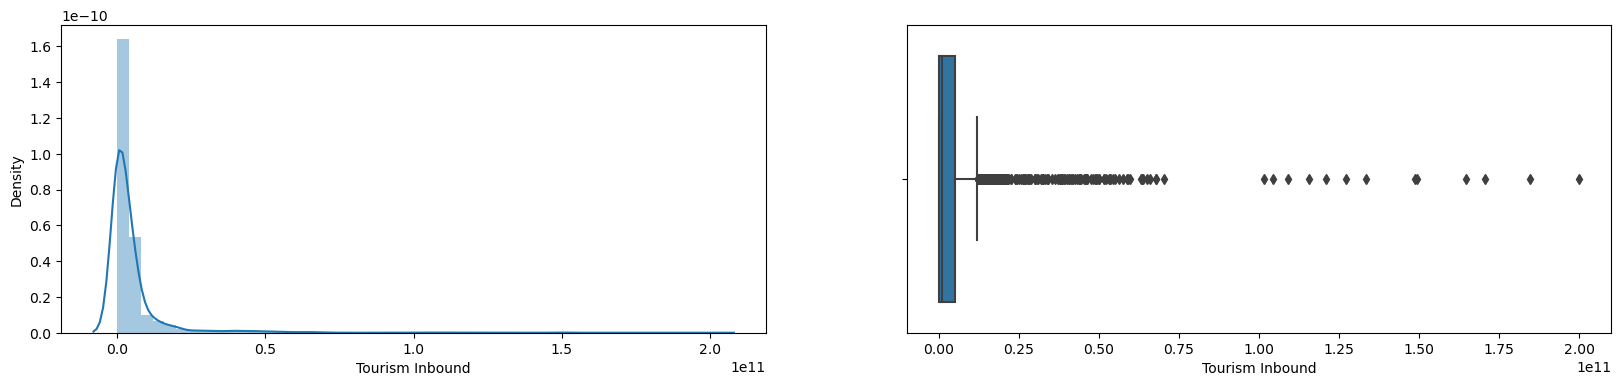

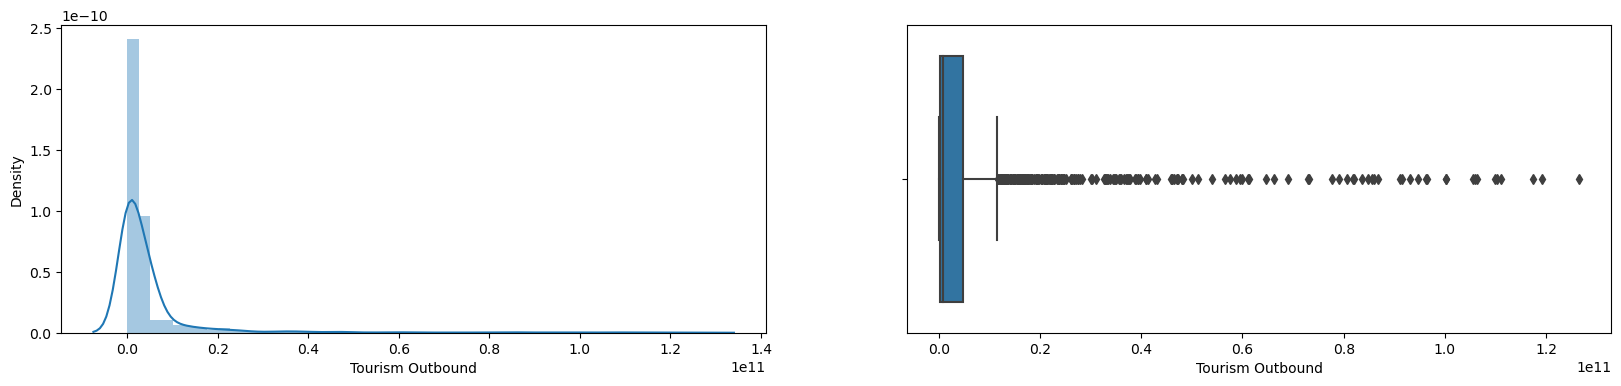

In [27]:
def plot(x,**kwarge):
  fig, ax = plt.subplots(1, 2, figsize=(20,4))
  sns.distplot(x, ax=ax[0],kde=True)
  sns.boxplot(x, ax=ax[1])
  plt.show()
for i in df4.columns:
  if i!="Country":
    plot(df4[i])
  else:
    continue

In [28]:
df6=pd.concat([df["Country"], df3], axis=1)
df6.head()

Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0       Algeria       0.020          48.966901        87931.0   
1        Angola       0.050          48.966901         9542.0   
2         Benin       0.043          48.966901         1617.0   
3      Botswana       0.027          48.966901         4276.0   
4  Burkina Faso       0.046          48.966901         1041.0   

   Days to Start Business  Ease of Business  Energy Usage           GDP  \
0               39.999418         94.875676  26998.000000  5.479006e+10   
1               39.999418         94.875676   7499.000000  9.129595e+09   
2               39.999418         94.875676   1983.000000  2.359122e+09   
3               39.999418         94.875676   1836.000000  5.788312e+09   
4               39.999418         94.875676  77236.840896  2.610959e+09   

   Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Female  \
0             0.035               60.0  ...                    71.0   
1             0.034               22.0  ...                    47.0   
2             0.043               15.0  ...                    57.0   
3             0.047              152.0  ...                    52.0   
4             0.051               12.0  ...                    52.0   

   Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                  67.0                 0.0            0.342   
1                  44.0                 0.0            0.476   
2                  53.0                 0.0            0.454   
3                  49.0                 0.1            0.383   
4                  49.0                 0.0            0.468   

   Population 15-64  Population 65+  Population Total  Population Urban  \
0             0.619           0.039          31719449             0.599   
1             0.499           0.025          13924930             0.324   
2             0.517           0.029           6949366             0.383   
3             0.587           0.029           1755375             0.532   
4             0.505           0.028          11607944             0.178   

   Tourism Inbound  Tourism Outbound  
0      102000000.0       193000000.0  
1       34000000.0       146000000.0  
2       77000000.0        50000000.0  
3      227000000.0       209000000.0  
4       23000000.0        30000000.0  

[5 rows x 24 columns]

In [29]:
df.corr()

Birth Rate  Business Tax Rate  CO2 Emissions  \
Birth Rate                1.000000           0.288982      -0.175750   
Business Tax Rate         0.288982           1.000000       0.022298   
CO2 Emissions            -0.175750           0.022298       1.000000   
Days to Start Business    0.169013           0.013339      -0.055666   
Ease of Business          0.727492           0.287221            NaN   
Energy Usage             -0.169664           0.059210       0.988715   
GDP                      -0.195565           0.005880       0.801876   
Health Exp % GDP         -0.227653           0.034727       0.163236   
Health Exp/Capita        -0.463907          -0.110941       0.254039   
Hours to do Tax           0.069324           0.138647       0.081485   
Infant Mortality Rate     0.872535           0.341270      -0.135421   
Internet Usage           -0.656132          -0.204663       0.137445   
Lending Interest          0.281503           0.131189      -0.085876   
Life Expectancy Female   -0.868174          -0.284273       0.135219   
Life Expectancy Male     -0.825745          -0.312970       0.141452   
Mobile Phone Usage       -0.558411          -0.233985       0.054400   
Number of Records              NaN                NaN            NaN   
Population 0-14           0.955966           0.218907      -0.198328   
Population 15-64         -0.912837          -0.258508       0.190808   
Population 65+           -0.773014          -0.106498       0.160403   
Population Total         -0.057851           0.058711       0.721145   
Population Urban         -0.606933          -0.123177       0.098051   
Tourism Inbound          -0.287021          -0.017257       0.696357   
Tourism Outbound         -0.296049          -0.021214       0.650080   

                        Days to Start Business  Ease of Business  \
Birth Rate                            0.169013          0.727492   
Business Tax Rate                     0.013339          0.287221   
CO2 Emissions                        -0.055666               NaN   
Days to Start Business                1.000000          0.308789   
Ease of Business                      0.308789          1.000000   
Energy Usage                         -0.069418         -0.234867   
GDP                                  -0.079282         -0.227305   
Health Exp % GDP                     -0.147686         -0.278061   
Health Exp/Capita                    -0.181849         -0.573508   
Hours to do Tax                       0.148423          0.346213   
Infant Mortality Rate                 0.200082          0.731639   
Internet Usage                       -0.243011         -0.774005   
Lending Interest                      0.146216          0.488395   
Life Expectancy Female               -0.197764         -0.709671   
Life Expectancy Male                 -0.213764         -0.706122   
Mobile Phone Usage                   -0.199868         -0.582954   
Number of Records                          NaN               NaN   
Population 0-14                       0.203978          0.741035   
Population 15-64                     -0.166224         -0.631452   
Population 65+                       -0.201973         -0.646456   
Population Total                      0.001357          0.029175   
Population Urban                     -0.092493         -0.493255   
Tourism Inbound                      -0.122206         -0.339292   
Tourism Outbound                     -0.117471         -0.314160   

                        Energy Usage       GDP  Health Exp % GDP  \
Birth Rate                 -0.169664 -0.195565         -0.227653   
Business Tax Rate           0.059210  0.005880          0.034727   
CO2 Emissions               0.988715  0.801876          0.163236   
Days to Start Business     -0.069418 -0.079282         -0.147686   
Ease of Business           -0.234867 -0.227305         -0.278061   
Energy Usage                1.000000  0.861041          0.253146   
GDP                         0.861041  1.000000

In [30]:
corr_matrix=df6.corr()

In [31]:
#Format the plot background and scatter plots for all the variables
#sns.set_style(style='darkgrid')
#sns.pairplot(df)


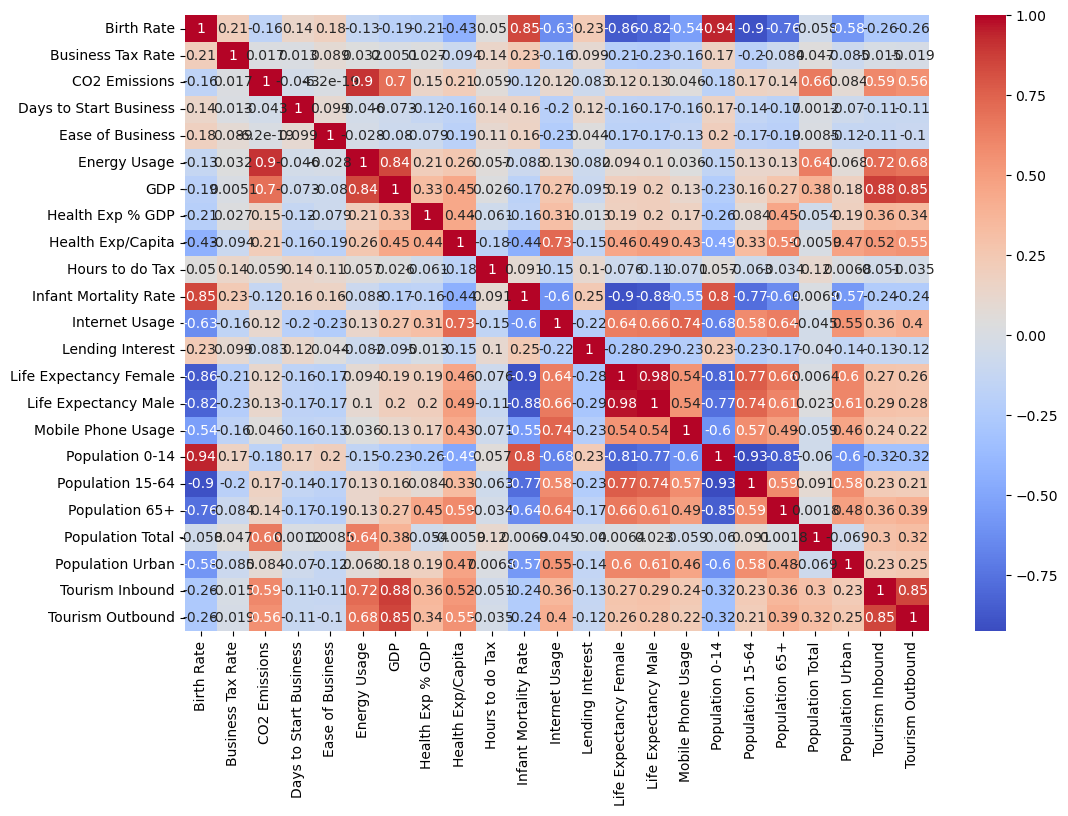

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [33]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [34]:
df_norm=norm_func(df6.iloc[:,1:])
df_norm

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0       0.282609           0.123200       0.010610                0.056276   
1       0.934783           0.123200       0.001151                0.056276   
2       0.782609           0.123200       0.000194                0.056276   
3       0.434783           0.123200       0.000515                0.056276   
4       0.847826           0.123200       0.000125                0.056276   
...          ...                ...            ...                     ...   
2699    0.341628           0.123200       0.017172                0.056276   
2700    0.130435           0.115443       0.017172                0.005772   
2701    0.173913           0.101843       0.017172                0.008658   
2702    0.282609           0.162285       0.017172                0.206349   
2703    0.086957           0.123200       0.017172                0.056276   

      Ease of Business  Energy Usage       GDP  Health Exp % GDP  \
0             0.499339      0.009895  0.003369          0.124424   
1             0.499339      0.002746  0.000558          0.119816   
2             0.499339      0.000724  0.000141          0.161290   
3             0.499339      0.000670  0.000352          0.179724   
4             0.499339      0.028313  0.000157          0.198157   
...                ...           ...       ...               ...   
2699          0.499339      0.028313  0.016239          0.258846   
2700          0.015957      0.781766  1.000000          0.788018   
2701          0.446809      0.028313  0.003074          0.373272   
2702          0.952128      0.028313  0.023468          0.175115   
2703          0.499339      0.028313  0.016239          0.258846   

      Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Female  \
0              0.005855         0.112082  ...                0.666667   
1              0.002019         0.112082  ...                0.166667   
2              0.001312         0.112082  ...                0.375000   
3              0.015142         0.112082  ...                0.270833   
4              0.001009         0.112082  ...                0.270833   
...                 ...              ...  ...                     ...   
2699           0.080698         0.112082  ...                0.669985   
2700           0.897739         0.062983  ...                0.875000   
2701           0.131839         0.115147  ...                0.854167   
2702           0.059661         0.301391  ...                0.812500   
2703           0.080698         0.112082  ...                0.916667   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                 0.588235            0.000000         0.586387   
1                 0.137255            0.000000         0.937173   
2                 0.313725            0.000000         0.879581   
3                 0.235294            0.034483         0.693717   
4                 0.235294            0.000000         0.916230   
...                    ...                 ...              ...   
2699              0.577683            0.199353         0.484427   
2700              0.764706            0.344828         0.204188   
2701              0.725490            0.517241         0.267016   
2702              0.686275            0.344828         0.445026   
2703              0.764706            0.199353         0.230366   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0             0.377604        0.149378          0.023470          0.563181   
1             0.065104        0.091286          0.010296          0.263617   
2             0.111979        0.107884          0.005131          0.327887   
3             0.294271        0.107884          0.001286          0.490196   
4             0.080729        0.103734          0.008580          0.104575   
...                ...             ...               ...               ...   
2699          0.389275  

In [35]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
df_norm1=pd.DataFrame(trans.fit_transform(df6.iloc[:,1:]))
df_norm1

0         1         2         3         4         5         6   \
0     0.282609  0.123200  0.010610  0.056276  0.499339  0.009895  0.003369   
1     0.934783  0.123200  0.001151  0.056276  0.499339  0.002746  0.000558   
2     0.782609  0.123200  0.000194  0.056276  0.499339  0.000724  0.000141   
3     0.434783  0.123200  0.000515  0.056276  0.499339  0.000670  0.000352   
4     0.847826  0.123200  0.000125  0.056276  0.499339  0.028313  0.000157   
...        ...       ...       ...       ...       ...       ...       ...   
2699  0.341628  0.123200  0.017172  0.056276  0.499339  0.028313  0.016239   
2700  0.130435  0.115443  0.017172  0.005772  0.015957  0.781766  1.000000   
2701  0.173913  0.101843  0.017172  0.008658  0.446809  0.028313  0.003074   
2702  0.282609  0.162285  0.017172  0.206349  0.952128  0.028313  0.023468   
2703  0.086957  0.123200  0.017172  0.056276  0.499339  0.028313  0.016239   

            7         8         9   ...        13        14        15  \
0     0.124424  0.005855  0.112082  ...  0.666667  0.588235  0.000000   
1     0.119816  0.002019  0.112082  ...  0.166667  0.137255  0.000000   
2     0.161290  0.001312  0.112082  ...  0.375000  0.313725  0.000000   
3     0.179724  0.015142  0.112082  ...  0.270833  0.235294  0.034483   
4     0.198157  0.001009  0.112082  ...  0.270833  0.235294  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
2699  0.258846  0.080698  0.112082  ...  0.669985  0.577683  0.199353   
2700  0.788018  0.897739  0.062983  ...  0.875000  0.764706  0.344828   
2701  0.373272  0.131839  0.115147  ...  0.854167  0.725490  0.517241   
2702  0.175115  0.059661  0.301391  ...  0.812500  0.686275  0.344828   
2703  0.258846  0.080698  0.112082  ...  0.916667  0.764706  0.199353   

            16        17        18        19        20        21        22  
0     0.586387  0.377604  0.149378  0.023470  0.563181  0.000506  0.001523  
1     0.937173  0.065104  0.091286  0.010296  0.263617  0.000166  0.001152  
2     0.879581  0.111979  0.107884  0.005131  0.327887  0.000381  0.000393  
3     0.693717  0.294271  0.107884  0.001286  0.490196  0.001131  0.001650  
4     0.916230  0.080729  0.103734  0.008580  0.104575  0.000111  0.000235  
...        ...       ...       ...       ...       ...       ...       ...  
2699  0.484427  0.389275  0.292384  0.000010  0.903050  0.024682  0.037364  
2700  0.204188  0.502604  0.551867  0.232369  0.794118  1.000000  1.000000  
2701  0.267016  0.429688  0.568465  0.002500  0.943355  0.011101  0.008120  
2702  0.445026  0.463542  0.236515  0.022164  0.879085  0.004514  0.025296  
2703  0.230366  0.434896  0.618257  0.000064  0.944444  0.024682  0.037364  

[2704 rows x 23 columns]

In [36]:
pca = PCA(n_components = 5)
pca_values = pca.fit_transform(df_norm1)
pca_values 

array([[ 0.18784966, -0.23198067, -0.19649428,  0.05916407,  0.08297052],
       [ 1.26087213,  0.32644302, -0.00605656,  0.09258058, -0.20656332],
       [ 0.94105227,  0.15683125, -0.05464067,  0.03215488, -0.03416078],
       ...,
       [-0.68020684,  0.19724802, -0.14484619, -0.04166621, -0.11797474],
       [-0.36122396,  0.11337657, -0.30047799, -0.13240095,  0.04647737],
       [-0.62013202,  0.03196882, -0.18577856,  0.14240686, -0.1028464 ]])

In [37]:
#loadings or weights
pca.components_

array([[ 0.37398895,  0.02992692, -0.01895441,  0.02015513,  0.0270442 ,
        -0.01977755, -0.02993698, -0.05534763, -0.14207982,  0.01099066,
         0.30017539, -0.33443274,  0.01251981, -0.32890079, -0.26548965,
        -0.17972711,  0.4207755 , -0.25182102, -0.26574627, -0.00263011,
        -0.32239727, -0.03861855, -0.05904863],
       [ 0.30373655,  0.04050848,  0.03351979, -0.02341803, -0.027671  ,
         0.07016154,  0.10462313,  0.1954295 ,  0.37798223, -0.03132174,
         0.23568189,  0.55640856,  0.00321339, -0.20969111, -0.12114186,
         0.20272641,  0.19349737, -0.23587115,  0.06884206, -0.03038616,
         0.31227302,  0.10880704,  0.18102401],
       [-0.08089418, -0.01039591,  0.07378846, -0.04359807, -0.0318215 ,
         0.10272705,  0.08964044,  0.15335286,  0.1293334 , -0.04304435,
         0.02566764,  0.23077258, -0.0065915 , -0.04863551, -0.05556082,
         0.0676989 , -0.16764346, -0.01483509,  0.2895266 ,  0.09478513,
        -0.8442607 ,  0.0909

In [38]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.62940432, 0.07810209, 0.0665979 , 0.04711065, 0.03874843])

In [39]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([62.94, 70.75, 77.41, 82.12, 85.99])

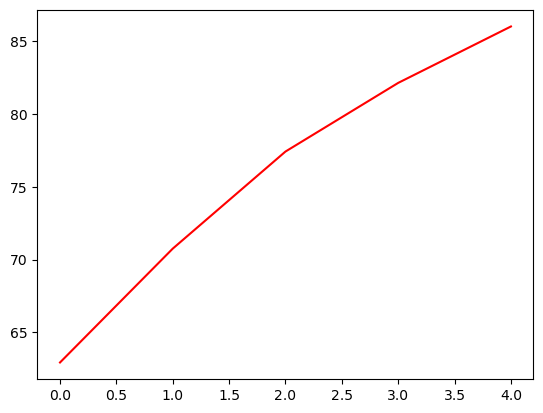

In [40]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [41]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), df6['Country']], axis = 1)
finalDf

pc1       pc2                   Country
0     0.187850 -0.231981                   Algeria
1     1.260872  0.326443                    Angola
2     0.941052  0.156831                     Benin
3     0.602600  0.009494                  Botswana
4     1.127340  0.171462              Burkina Faso
...        ...       ...                       ...
2699 -0.122171  0.119101  Turks and Caicos Islands
2700 -1.069945  1.045019             United States
2701 -0.680207  0.197248                   Uruguay
2702 -0.361224  0.113377             Venezuela, RB
2703 -0.620132  0.031969     Virgin Islands (U.S.)

[2704 rows x 3 columns]

In [42]:
import matplotlib.pyplot as plt
plt.style.use('classic')

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

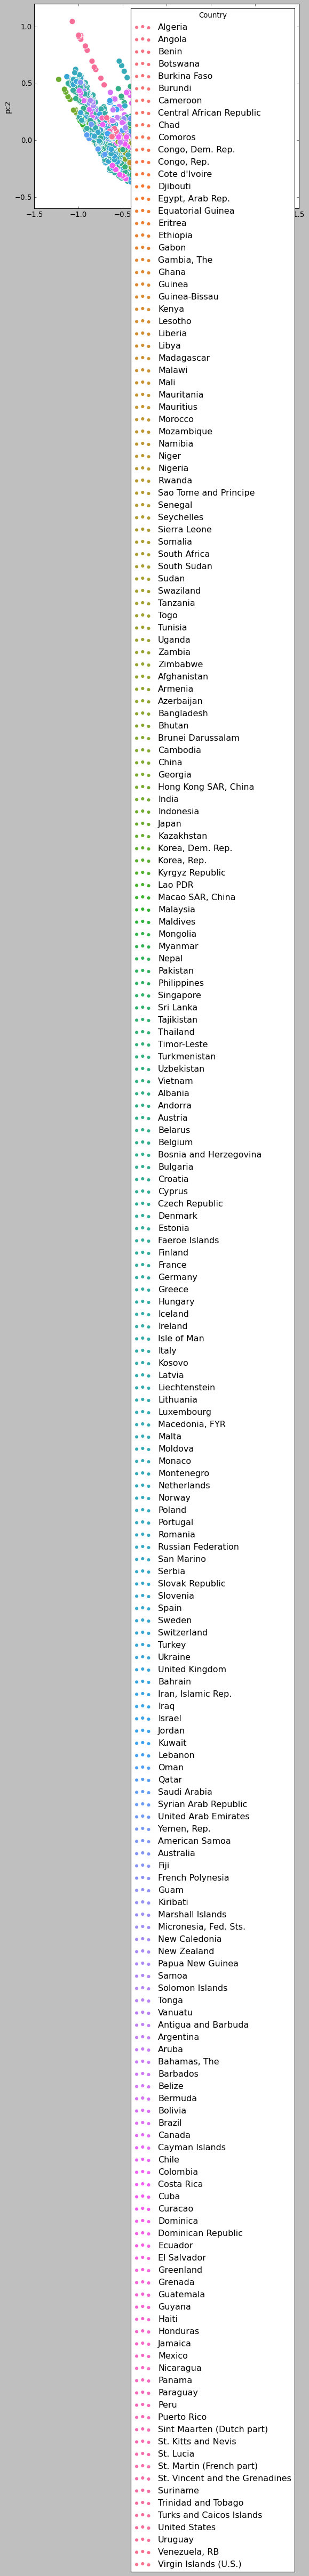

In [43]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Country',s = 100)  

In [44]:
array=df2.values
array 

array([[2.00000000e-02, 4.89669009e+01, 8.79310000e+04, ...,
        5.99000000e-01, 1.02000000e+08, 1.93000000e+08],
       [5.00000000e-02, 4.89669009e+01, 9.54200000e+03, ...,
        3.24000000e-01, 3.40000000e+07, 1.46000000e+08],
       [4.30000000e-02, 4.89669009e+01, 1.61700000e+03, ...,
        3.83000000e-01, 7.70000000e+07, 5.00000000e+07],
       ...,
       [1.50000000e-02, 4.19000000e+01, 1.42307108e+05, ...,
        9.48000000e-01, 2.22200000e+09, 1.02800000e+09],
       [2.00000000e-02, 6.19000000e+01, 1.42307108e+05, ...,
        8.89000000e-01, 9.04000000e+08, 3.20200000e+09],
       [1.10000000e-02, 4.89669009e+01, 1.42307108e+05, ...,
        9.49000000e-01, 4.93932025e+09, 4.72943480e+09]])

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_stand = pd.DataFrame(scaler.fit_transform(df6.iloc[:,1:]))
df_stand

0             1         2         3         4             5   \
0    -2.449385e-01  4.784937e-16 -0.099610  0.000000  0.000000 -2.379575e-01   
1     2.461670e+00  4.784937e-16 -0.243209  0.000000  0.000000 -3.303150e-01   
2     1.830128e+00  4.784937e-16 -0.257727  0.000000  0.000000 -3.564417e-01   
3     3.866036e-01  4.784937e-16 -0.252856  0.000000  0.000000 -3.571379e-01   
4     2.100789e+00  4.784937e-16 -0.258782  0.000000  0.000000 -6.892550e-17   
...            ...           ...       ...       ...       ...           ...   
2699  8.764407e-15  4.784937e-16  0.000000  0.000000  0.000000 -6.892550e-17   
2700 -8.764806e-01 -8.643011e-02  0.000000 -0.766273 -6.358075  9.734548e+00   
2701 -6.960400e-01 -2.379496e-01  0.000000 -0.722485 -0.690947 -6.892550e-17   
2702 -2.449385e-01  4.354703e-01  0.000000  2.276976  5.955685 -6.892550e-17   
2703 -1.056921e+00  4.784937e-16  0.000000  0.000000  0.000000 -6.892550e-17   

                6             7         8         9   ...            13  \
0    -1.926981e-01 -1.177630e+00 -0.534758  0.000000  ... -1.526510e-02   
1    -2.347842e-01 -1.218002e+00 -0.562167  0.000000  ... -2.315556e+00   
2    -2.410247e-01 -8.546543e-01 -0.567216  0.000000  ... -1.357101e+00   
3    -2.378639e-01 -6.931666e-01 -0.468400  0.000000  ... -1.836328e+00   
4    -2.407925e-01 -5.316789e-01 -0.569380  0.000000  ... -1.836328e+00   
...            ...           ...       ...       ...  ...           ...   
2699  2.812861e-17  1.680819e-15  0.000000  0.000000  ...  1.362046e-15   
2700  1.472975e+01  4.635928e+00  5.837788 -0.642723  ...  9.431892e-01   
2701 -1.971092e-01  1.002454e+00  0.365405  0.040118  ...  8.473438e-01   
2702  1.082394e-01 -7.335385e-01 -0.150314  2.478114  ...  6.556529e-01   
2703  2.812861e-17  1.680819e-15  0.000000  0.000000  ...  1.134880e+00   

            14        15            16            17            18        19  \
0     0.058820 -1.257704  3.813704e-01 -6.713540e-02 -7.259726e-01  0.002110   
1    -2.455048 -1.257704  1.693440e+00 -1.864811e+00 -1.020873e+00 -0.141087   
2    -1.471361 -1.257704  1.478026e+00 -1.595159e+00 -9.366158e-01 -0.197221   
3    -1.908555 -1.040155  7.828246e-01 -5.465154e-01 -9.366158e-01 -0.239018   
4    -1.908555 -1.257704  1.615108e+00 -1.774927e+00 -9.576801e-01 -0.159732   
...        ...       ...           ...           ...           ...       ...   
2699  0.000000  0.000000 -2.717705e-15  1.330547e-14  2.923261e-16 -0.252883   
2700  1.042508  0.917789 -1.048198e+00  6.519347e-01  1.317266e+00  2.272669   
2701  0.823911  2.005535 -8.132005e-01  2.324771e-01  1.401523e+00 -0.225822   
2702  0.605314  0.917789 -1.473741e-01  4.272253e-01 -2.836220e-01 -0.012091   
2703  1.042508  0.000000 -9.502824e-01  2.624384e-01  1.654295e+00 -0.252297   

            20         21            22  
0     0.147333  -0.375824 -3.763345e-01  
1    -0.976646  -0.381107 -3.802335e-01  
2    -0.735502  -0.377766 -3.881975e-01  
3    -0.126509  -0.366112 -3.750072e-01  
4    -1.573377  -0.381961 -3.898567e-01  
...        ...        ...           ...  
2699  1.422539   0.000000 -7.911511e-17  
2700  1.013819  15.161905  1.010792e+01  
2701  1.573765  -0.211115 -3.070644e-01  
2702  1.332620  -0.313514 -1.267132e-01  
2703  1.577852   0.000000 -7.911511e-17  

[2704 rows x 23 columns]

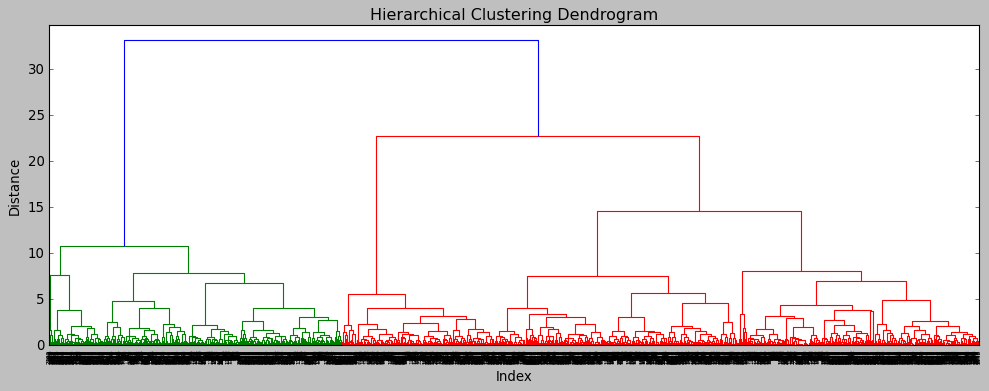

In [46]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm1, method="ward",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=6, linkage='ward',affinity = "euclidean").fit(df_norm1) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df6['clust']=cluster_labels # creating a  new column and assigning it to new column 
df6

Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0                      Algeria    0.020000          48.966901   87931.000000   
1                       Angola    0.050000          48.966901    9542.000000   
2                        Benin    0.043000          48.966901    1617.000000   
3                     Botswana    0.027000          48.966901    4276.000000   
4                 Burkina Faso    0.046000          48.966901    1041.000000   
...                        ...         ...                ...            ...   
2699  Turks and Caicos Islands    0.022715          48.966901  142307.107765   
2700             United States    0.013000          46.400000  142307.107765   
2701                   Uruguay    0.015000          41.900000  142307.107765   
2702             Venezuela, RB    0.020000          61.900000  142307.107765   
2703     Virgin Islands (U.S.)    0.011000          48.966901  142307.107765   

      Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                  39.999418         94.875676  2.699800e+04  5.479006e+10   
1                  39.999418         94.875676  7.499000e+03  9.129595e+09   
2                  39.999418         94.875676  1.983000e+03  2.359122e+09   
3                  39.999418         94.875676  1.836000e+03  5.788312e+09   
4                  39.999418         94.875676  7.723684e+04  2.610959e+09   
...                      ...               ...           ...           ...   
2699               39.999418         94.875676  7.723684e+04  2.638540e+11   
2700                5.000000          4.000000  2.132446e+06  1.624460e+13   
2701                7.000000         85.000000  7.723684e+04  5.000435e+10   
2702              144.000000        180.000000  7.723684e+04  3.812862e+11   
2703               39.999418         94.875676  7.723684e+04  2.638540e+11   

      Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Male  \
0              0.03500          60.000000  ...             67.000000   
1              0.03400          22.000000  ...             44.000000   
2              0.04300          15.000000  ...             53.000000   
3              0.04700         152.000000  ...             49.000000   
4              0.05100          12.000000  ...             49.000000   
...                ...                ...  ...                   ...   
2699           0.06417         801.397077  ...             66.461838   
2700           0.17900        8895.000000  ...             76.000000   
2701           0.08900        1308.000000  ...             74.000000   
2702           0.04600         593.000000  ...             72.000000   
2703           0.06417         801.397077  ...             76.000000   

      Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0               0.000000         0.342000          0.619000        0.039000   
1               0.000000         0.476000          0.499000        0.025000   
2               0.000000         0.454000          0.517000        0.029000   
3               0.100000         0.383000          0.587000        0.029000   
4               0.000000         0.468000          0.505000        0.028000   
...                  ...              ...               ...             ...   
2699            0.578124         0.303051          0.623481        0.073465   
2700            1.000000         0.196000          0.667000        0.136000   
2701            1.500000         0.220000          0.639000        0.140000   
2702            1.000000         0.288000          0.652000        0.060000   
2703            0.578124         0.206000          0.641000        0.152000   

      Population Total  Population Urban  Tourism Inbound  Tourism Outbound  \
0             31719449             0.599     1.020000e+08      1.930000e+08   
1             13924930             0.324     3.400000e+07      1.460000e+08   
2              6949366             0.383     7.700000e+07      5.000000e+0

In [48]:
df6.iloc[:,1:].groupby(df6.clust).mean() 

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
clust                                                                         
0        0.012079          45.286598   1.388597e+05               30.017025   
1        0.011643          43.338042   6.186121e+05               13.802518   
2        0.040914          67.955771   2.433480e+04               47.827850   
3        0.027733          44.563809   5.200113e+04               45.750165   
4        0.019248          45.762787   9.479505e+04               45.109370   
5        0.017654          61.775731   3.059900e+06               42.461404   

       Ease of Business  Energy Usage           GDP  Health Exp % GDP  \
clust                                                                   
0             92.157643  6.542379e+04  2.518202e+11          0.071663   
1             87.308728  2.977946e+05  2.168957e+12          0.103847   
2             95.812878  4.811177e+04  2.553047e+10          0.060341   
3             98.581893  4.048047e+04  3.861861e+10          0.056109   
4             94.868036  5.555692e+04  1.457097e+11          0.058953   
5             96.423701  1.121467e+06  2.342340e+12          0.044577   

       Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Male  \
clust                                      ...                         
0            1261.288217       298.269168  ...             72.857126   
1            5167.363057       176.010908  ...             77.993631   
2             107.402483       328.216734  ...             51.004525   
3             116.787584       293.377499  ...             63.777587   
4             513.530506       324.727879  ...             70.084146   
5              84.576923       369.026347  ...             67.807692   

       Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
clust                                                                          
0                0.865337         0.193829          0.682128        0.124042   
1                1.055414         0.176293          0.665522        0.158172   
2                0.194514         0.443432          0.526708        0.029833   
3                0.318565         0.371431          0.585987        0.042586   
4                0.705333         0.282817          0.654090        0.063098   
5                0.315385         0.262231          0.674885        0.062885   

       Population Total  Population Urban  Tourism Inbound  Tourism Outbound  \
clust                                                                          
0          1.402356e+07          0.753233     6.872267e+09      5.664359e+09   
1          5.021108e+07          0.829376     2.807744e+10      3.184624e+10   
2          1.706605e+07          0.327014     1.176885e+09      1.476877e+09   
3          2.310295e+07          0.400496     1.306162e+09      1.171115e+09   
4          1.725438e+07          0.637743     3.173987e+09      2.595061e+09   
5          1.225428e+09          0.367154     2.241712e+10      2.373215e+10   

       clust  
clust         
0        0.0  
1        1.0  
2        2.0  
3        3.0  
4        4.0  
5        5.0  

[6 rows x 24 columns]

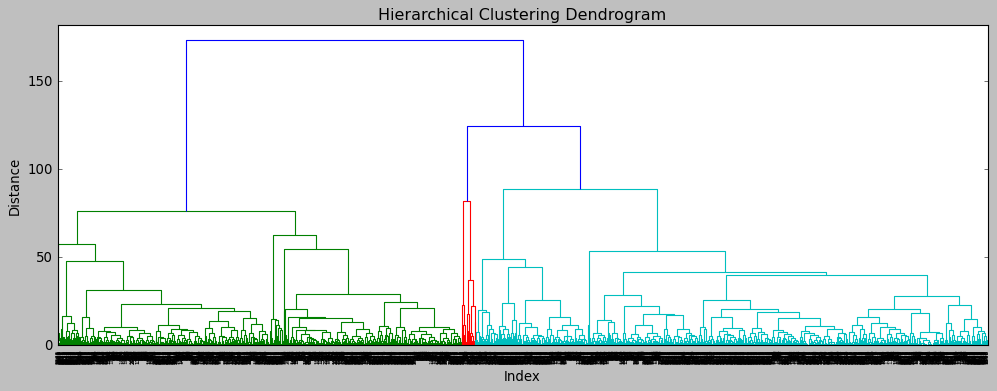

In [49]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_stand, method="ward",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show() 

In [50]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=6, linkage='ward',affinity = "euclidean").fit(df_stand) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df6['clust']=cluster_labels # creating a  new column and assigning it to new column 
df6   

Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0                      Algeria    0.020000          48.966901   87931.000000   
1                       Angola    0.050000          48.966901    9542.000000   
2                        Benin    0.043000          48.966901    1617.000000   
3                     Botswana    0.027000          48.966901    4276.000000   
4                 Burkina Faso    0.046000          48.966901    1041.000000   
...                        ...         ...                ...            ...   
2699  Turks and Caicos Islands    0.022715          48.966901  142307.107765   
2700             United States    0.013000          46.400000  142307.107765   
2701                   Uruguay    0.015000          41.900000  142307.107765   
2702             Venezuela, RB    0.020000          61.900000  142307.107765   
2703     Virgin Islands (U.S.)    0.011000          48.966901  142307.107765   

      Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                  39.999418         94.875676  2.699800e+04  5.479006e+10   
1                  39.999418         94.875676  7.499000e+03  9.129595e+09   
2                  39.999418         94.875676  1.983000e+03  2.359122e+09   
3                  39.999418         94.875676  1.836000e+03  5.788312e+09   
4                  39.999418         94.875676  7.723684e+04  2.610959e+09   
...                      ...               ...           ...           ...   
2699               39.999418         94.875676  7.723684e+04  2.638540e+11   
2700                5.000000          4.000000  2.132446e+06  1.624460e+13   
2701                7.000000         85.000000  7.723684e+04  5.000435e+10   
2702              144.000000        180.000000  7.723684e+04  3.812862e+11   
2703               39.999418         94.875676  7.723684e+04  2.638540e+11   

      Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Male  \
0              0.03500          60.000000  ...             67.000000   
1              0.03400          22.000000  ...             44.000000   
2              0.04300          15.000000  ...             53.000000   
3              0.04700         152.000000  ...             49.000000   
4              0.05100          12.000000  ...             49.000000   
...                ...                ...  ...                   ...   
2699           0.06417         801.397077  ...             66.461838   
2700           0.17900        8895.000000  ...             76.000000   
2701           0.08900        1308.000000  ...             74.000000   
2702           0.04600         593.000000  ...             72.000000   
2703           0.06417         801.397077  ...             76.000000   

      Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0               0.000000         0.342000          0.619000        0.039000   
1               0.000000         0.476000          0.499000        0.025000   
2               0.000000         0.454000          0.517000        0.029000   
3               0.100000         0.383000          0.587000        0.029000   
4               0.000000         0.468000          0.505000        0.028000   
...                  ...              ...               ...             ...   
2699            0.578124         0.303051          0.623481        0.073465   
2700            1.000000         0.196000          0.667000        0.136000   
2701            1.500000         0.220000          0.639000        0.140000   
2702            1.000000         0.288000          0.652000        0.060000   
2703            0.578124         0.206000          0.641000        0.152000   

      Population Total  Population Urban  Tourism Inbound  Tourism Outbound  \
0             31719449             0.599     1.020000e+08      1.930000e+08   
1             13924930             0.324     3.400000e+07      1.460000e+08   
2              6949366             0.383     7.700000e+07      5.000000e+0

In [51]:
df6.iloc[:,1:].groupby(df6.clust).mean() 

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
clust                                                                         
0        0.039580          63.186001   2.239908e+04               52.217667   
1        0.011549          44.211630   2.262172e+05               20.993745   
2        0.026130          44.775786   6.537692e+04               51.089216   
3        0.017654          61.775731   3.059900e+06               42.461404   
4        0.013769          47.387270   4.809031e+06               13.461404   
5        0.016137          45.403811   9.985096e+04               33.826210   

       Ease of Business  Energy Usage           GDP  Health Exp % GDP  \
clust                                                                   
0             95.335936  4.469180e+04  2.251992e+10          0.058007   
1             83.971796  1.104097e+05  8.818895e+11          0.090047   
2            100.641652  4.543537e+04  5.696249e+10          0.059455   
3             96.423701  1.121467e+06  2.342340e+12          0.044577   
4             87.885239  2.250944e+06  1.330715e+13          0.161154   
5             94.705117  5.280438e+04  1.240795e+11          0.061732   

       Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Male  \
clust                                      ...                         
0              92.698032       326.536917  ...             52.971429   
1            3455.766240       217.847427  ...             77.021472   
2             152.032473       281.490928  ...             64.612766   
3              84.576923       369.026347  ...             67.807692   
4            6967.384615       262.180193  ...             75.153846   
5             689.185596       323.706485  ...             70.844466   

       Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
clust                                                                          
0                0.196149         0.440291          0.529521        0.030170   
1                1.034663         0.174313          0.672939        0.152773   
2                0.310310         0.357943          0.597669        0.044374   
3                0.315385         0.262231          0.674885        0.062885   
4                0.715385         0.204154          0.669385        0.126385   
5                0.779865         0.246095          0.666811        0.087097   

       Population Total  Population Urban  Tourism Inbound  Tourism Outbound  \
clust                                                                          
0          1.713338e+07          0.315698     1.100266e+09      1.366009e+09   
1          2.693426e+07          0.791402     1.683451e+10      1.833359e+10   
2          2.434168e+07          0.474480     1.425094e+09      1.375829e+09   
3          1.225428e+09          0.367154     2.241712e+10      2.373215e+10   
4          2.983420e+08          0.800923     1.408008e+11      1.024878e+11   
5          1.372471e+07          0.666386     3.403810e+09      2.793096e+09   

       clust  
clust         
0        0.0  
1        1.0  
2        2.0  
3        3.0  
4        4.0  
5        5.0  

[6 rows x 24 columns]

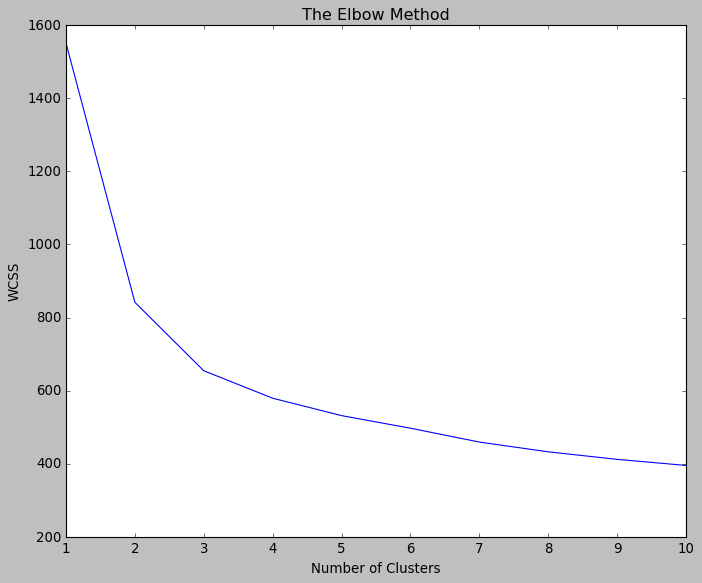

In [52]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [53]:
clf = KMeans(n_clusters=6)
y_kmeans = clf.fit_predict(df_norm1) 

In [54]:
from sklearn.neighbors import NearestNeighbors

In [55]:
neigh = NearestNeighbors(n_neighbors=48)
nbrs = neigh.fit(df_stand)
distances, indices = nbrs.kneighbors(df_stand)  

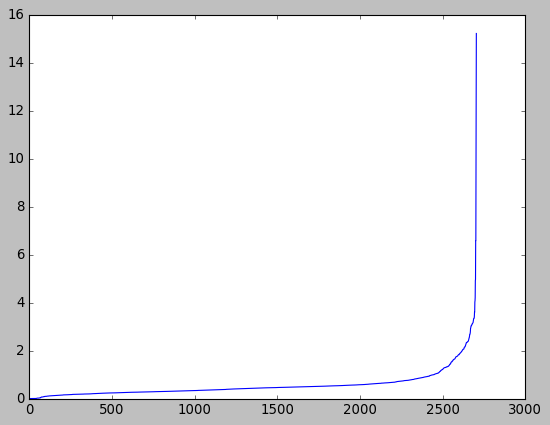

In [56]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances) 

In [57]:
dbscan = DBSCAN(eps=3.0, min_samples=48)
dbscan.fit(df_stand)

DBSCAN(eps=3.0, min_samples=48)

In [58]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0, ...,  0, -1,  0])

In [59]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [60]:
cl
pd.set_option("display.max_rows", None)  

In [61]:
cl   

cluster
0           0
1          -1
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
30          0
31          0
32          0
33          0
34          0
35          0
36          0
37          0
38          0
39          0
40          0
41         -1
42          0
43          0
44          0
45          0
46          0
47          0
48          0
49          0
50          0
51          0
52          0
53          0
54          0
55          0
56          0
57          0
58          0
59          0
60         -1
61          0
62          0
63         -1
64          0
65         -1
66          0
67          0
68          0
69          0
70          0
71          0
72          0
73          0
74          0
75          0
76          0
77          0
78          0
79          0
80          0
81          0
82          0
83          0
84          0
85          0
86          0
87          0
88          0
89          0
90          0
91          0
92          0
93          0
94          0
95          0
96          0
97          0
98          0
99          0
100         0
101         0
102        -1
103         0
104         0
105         0
106         0
107         0
108         0
109         0
110         0
111         0
112         0
113         0
114         0
115         0
116         0
117         0
118         0
119         0
120         0
121         0
122         0
123         0
124        -1
125         0
126         0
127         0
128         0
129         0
130         0
131         0
132         0
133         0
134         0
135         0
136         0
137         0
138         0
139         0
140         0
141         0
142         0
143         0
144         0
145         0
146         0
147         0
148         0
149         0
150         0
151         0
152         0
153         0
154        -1
155         0
156         0
157         0
158         0
159         0
160         0
161         0
162         0
163         0
164         0
165         0
166         0
167         0
168         0
169         0
170         0
171         0
172         0
173         0
174         0
175         0
176         0
177         0
178         0
179         0
180         0
181         0
182         0
183         0
184         0
185         0
186         0
187         0
188         0
189         0
190         0
191         0
192         0
193         0
194         0
195         0
196         0
197         0
198         0
199         0
200         0
201         0
202         0
203         0
204        -1
205         0
206         0
207         0
208         0
209        -1
210         0
211         0
212         0
213         0
214         0
215         0
216         0
217         0
218         0
219         0
220         0
221         0
222         0
223         0
224         0
225         0
226         0
227         0
228         0
229         0
230         0
231         0
232         0
233         0
234         0
235         0
236         0
237         0
238         0
239         0
240         0
241         0
242         0
243         0
244         0
245         0
246         0
247         0
248         0
249        -1
250         0
251         0
252         0
253         0
254         0
255         0
256         0
257         0
258         0
259         0
260         0
261         0
262         0
263         0
264         0
265         0
266         0
267         0
268        -1
269         0
270         0
271        -1
272         0
273        -1
274         0
275         0
276         0
277         0
278         0
279         0
280         0
281         0
282         0
283         0
284         0
28

In [62]:
data = pd.concat([df6,cl],axis=1)  
data

Country  Birth Rate  Business Tax Rate  \
0                            Algeria    0.020000          48.966901   
1                             Angola    0.050000          48.966901   
2                              Benin    0.043000          48.966901   
3                           Botswana    0.027000          48.966901   
4                       Burkina Faso    0.046000          48.966901   
5                            Burundi    0.042000          48.966901   
6                           Cameroon    0.041000          48.966901   
7           Central African Republic    0.039000          48.966901   
8                               Chad    0.051000          48.966901   
9                            Comoros    0.039000          48.966901   
10                  Congo, Dem. Rep.    0.048000          48.966901   
11                       Congo, Rep.    0.039000          48.966901   
12                     Cote d'Ivoire    0.038000          48.966901   
13                          Djibouti    0.030000          48.966901   
14                  Egypt, Arab Rep.    0.025000          48.966901   
15                 Equatorial Guinea    0.040000          48.966901   
16                           Eritrea    0.040000          48.966901   
17                          Ethiopia    0.044000          48.966901   
18                             Gabon    0.034000          48.966901   
19                       Gambia, The    0.045000          48.966901   
20                             Ghana    0.035000          48.966901   
21                            Guinea    0.042000          48.966901   
22                     Guinea-Bissau    0.042000          48.966901   
23                             Kenya    0.039000          48.966901   
24                           Lesotho    0.031000          48.966901   
25                           Liberia    0.043000          48.966901   
26                             Libya    0.022000          48.966901   
27                        Madagascar    0.041000          48.966901   
28                            Malawi    0.045000          48.966901   
29                              Mali    0.048000          48.966901   
30                        Mauritania    0.038000          48.966901   
31                         Mauritius    0.017000          48.966901   
32                           Morocco    0.022000          48.966901   
33                        Mozambique    0.044000          48.966901   
34                           Namibia    0.032000          48.966901   
35                             Niger    0.053000          48.966901   
36                           Nigeria    0.043000          48.966901   
37                            Rwanda    0.041000          48.966901   
38             Sao Tome and Principe    0.036000          48.966901   
39                           Senegal    0.040000          48.966901   
40                        Seychelles    0.019000          48.966901   
41                      Sierra Leone    0.044000          48.966901   
42                           Somalia    0.049000          48.966901   
43                      South Africa    0.024000          48.966901   
44                       South Sudan    0.043000          48.966901   
45                             Sudan    0.040000          48.966901   
46                         Swaziland    0.033000          48.966901   
47                          Tanzania    0.042000          48.966901   
48                              Togo    0.039000          48.966901   
49                           Tunisia    0.017000          48.966901   
50                            Uganda    0.048000          48.966901   
51                            Zambia    0.045000          48.966901   
52                          Zimbabwe    0.032000          48.966901   
53                       Afghanistan    0.050000          48.966901   
54                           Armenia    0.013000          48.966901   
55                        Azerbaijan    0.015000     

In [63]:
dl = dbscan.labels_   

In [64]:
import sklearn
sklearn.metrics.silhouette_score(df_stand, dl)   

0.4582230986503435

In [69]:
dbscan = DBSCAN(eps=3.5, min_samples=50)
dbscan.fit(df_stand)

DBSCAN(eps=3.5, min_samples=50)

In [70]:
dbscan.labels_  

array([ 0, -1,  0, ...,  0, -1,  0], dtype=int64)

In [71]:
dl1 = dbscan.labels_  

In [72]:
import sklearn
sklearn.metrics.silhouette_score(df_stand, dl1)

0.5089135832913406

In [73]:
dbscan = DBSCAN(eps=3.57, min_samples=55)
dbscan.fit(df_stand)

DBSCAN(eps=3.57, min_samples=55)

In [74]:
dbscan.labels_ 

array([ 0, -1,  0, ...,  0, -1,  0], dtype=int64)

In [75]:
dl2 = dbscan.labels_ 

In [76]:
import sklearn
sklearn.metrics.silhouette_score(df_stand, dl2)

0.5116990274944775

In [77]:
dbscan = DBSCAN(eps=4.58, min_samples=60)
dbscan.fit(df_stand)

DBSCAN(eps=4.58, min_samples=60)

In [78]:
dbscan.labels_ 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
dl3 = dbscan.labels_ 

In [80]:
import sklearn
sklearn.metrics.silhouette_score(df_stand, dl3)

0.6185209563476849

## Random Forest

In [73]:
import joblib
joblib.dump(clf,"kmeans_model.pkl")

['kmeans_model.pkl']

In [74]:
df6.head()

Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0       Algeria       0.020          48.966901        87931.0   
1        Angola       0.050          48.966901         9542.0   
2         Benin       0.043          48.966901         1617.0   
3      Botswana       0.027          48.966901         4276.0   
4  Burkina Faso       0.046          48.966901         1041.0   

   Days to Start Business  Ease of Business  Energy Usage           GDP  \
0               39.999418         94.875676  26998.000000  5.479006e+10   
1               39.999418         94.875676   7499.000000  9.129595e+09   
2               39.999418         94.875676   1983.000000  2.359122e+09   
3               39.999418         94.875676   1836.000000  5.788312e+09   
4               39.999418         94.875676  77236.840896  2.610959e+09   

   Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               60.0  ...                  67.0   
1             0.034               22.0  ...                  44.0   
2             0.043               15.0  ...                  53.0   
3             0.047              152.0  ...                  49.0   
4             0.051               12.0  ...                  49.0   

   Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0                 0.0            0.342             0.619           0.039   
1                 0.0            0.476             0.499           0.025   
2                 0.0            0.454             0.517           0.029   
3                 0.1            0.383             0.587           0.029   
4                 0.0            0.468             0.505           0.028   

   Population Total  Population Urban  Tourism Inbound  Tourism Outbound  \
0          31719449             0.599      102000000.0       193000000.0   
1          13924930             0.324       34000000.0       146000000.0   
2           6949366             0.383       77000000.0        50000000.0   
3           1755375             0.532      227000000.0       209000000.0   
4          11607944             0.178       23000000.0        30000000.0   

   clust  
0      2  
1      0  
2      0  
3      2  
4      0  

[5 rows x 25 columns]

In [75]:
df6.to_csv("World_development_mesurement.xlsx")

In [76]:
x=df6.drop(['clust','Country'],axis=1)
y=df6['clust']

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [79]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1892, 23)
(1892,)
(812, 23)
(812,)


In [80]:
#Decision_Tree
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=15, max_depth=25, random_state=11)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [81]:
!pip install scikit-learn


In [82]:
#Confusion_Matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics


In [83]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[167   0   2   0   0   0]
 [  0  98   0   0   0   7]
 [  6   0 182   0   0   8]
 [  0   0   0   9   0   1]
 [  0   0   0   0   5   0]
 [  0   1   9   0   0 317]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       169
           1       0.99      0.93      0.96       105
           2       0.94      0.93      0.94       196
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00         5
           5       0.95      0.97      0.96       327

    accuracy                           0.96       812
   macro avg       0.98      0.95      0.96       812
weighted avg       0.96      0.96      0.96       812



In [84]:
from sklearn.metrics import accuracy_score
score=accuracy_score

In [91]:
import pickle
from pickle import dump,load
filename = 'world_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [92]:
# load the model from disk
model = pickle.load(open(filename, 'rb'))
result = model.score (x_test, y_test)
print(result,'% Acuuracy')

0.958128078817734 % Acuuracy


## Deployement

In [87]:
# installing streamlit library
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 12.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 kB 5.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.8/982.8 kB 7.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 7.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 2.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 2.8 MB/s eta 0:00:0

In [102]:
cluster_1=df6[df6["clust"]==0]
cluster_1

Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
1                       Angola       0.050          48.966901    9542.000000   
2                        Benin       0.043          48.966901    1617.000000   
4                 Burkina Faso       0.046          48.966901    1041.000000   
5                      Burundi       0.042          48.966901     301.000000   
6                     Cameroon       0.041          48.966901    3432.000000   
7     Central African Republic       0.039          48.966901     268.000000   
8                         Chad       0.051          48.966901     176.000000   
9                      Comoros       0.039          48.966901      84.000000   
10            Congo, Dem. Rep.       0.048          48.966901    1646.000000   
11                 Congo, Rep.       0.039          48.966901    1049.000000   
12               Cote d'Ivoire       0.038          48.966901    6791.000000   
15           Equatorial Guinea       0.040          48.966901     455.000000   
16                     Eritrea       0.040          48.966901     609.000000   
17                    Ethiopia       0.044          48.966901    5831.000000   
19                 Gambia, The       0.045          48.966901     275.000000   
21                      Guinea       0.042          48.966901    1280.000000   
22               Guinea-Bissau       0.042          48.966901     147.000000   
23                       Kenya       0.039          48.966901   10418.000000   
24                     Lesotho       0.031          48.966901  142307.107765   
25                     Liberia       0.043          48.966901     436.000000   
27                  Madagascar       0.041          48.966901    1874.000000   
28                      Malawi       0.045          48.966901     906.000000   
29                        Mali       0.048          48.966901     543.000000   
30                  Mauritania       0.038          48.966901    1236.000000   
33                  Mozambique       0.044          48.966901    1349.000000   
34                     Namibia       0.032          48.966901    1643.000000   
35                       Niger       0.053          48.966901     796.000000   
36                     Nigeria       0.043          48.966901   79182.000000   
37                      Rwanda       0.041          48.966901     686.000000   
39                     Senegal       0.040          48.966901    3938.000000   
41                Sierra Leone       0.044          48.966901     425.000000   
42                     Somalia       0.049          48.966901     517.000000   
44                 South Sudan       0.043          48.966901  142307.107765   
45                       Sudan       0.040          48.966901    5534.000000   
46                   Swaziland       0.033          48.966901    1188.000000   
47                    Tanzania       0.042          48.966901    2651.000000   
48                        Togo       0.039          48.966901    1357.000000   
50                      Uganda       0.048          48.966901    1533.000000   
51                      Zambia       0.045          48.966901    1819.000000   
52                    Zimbabwe       0.032          48.966901   13887.000000   
53                 Afghanistan       0.050          48.966901     781.000000   
59                    Cambodia       0.028          48.966901    1977.000000   
70                     Lao PDR       0.031          48.966901     972.000000   
76                       Nepal       0.033          48.966901    3234.000000   
81                  Tajikistan       0.030          48.966901    2237.000000   
83                 Timor-Leste       0.043          48.966901  142307.107765   
147                Yemen, Rep.       0.039          48.966901   14639.000000   
158           Papua New Guinea       0.035          48.966901    2688.000000   
187                      Haiti       0.031          48.966901    1368.000000   
209                    

In [103]:
cluster_2=df6[df6["clust"]==1]
cluster_2

Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
65                   Japan       0.009          48.966901   1.219589e+06   
89                 Austria       0.010          48.966901   6.369600e+04   
91                 Belgium       0.011          48.966901   1.157090e+05   
97                 Denmark       0.013          48.966901   4.726000e+04   
100                Finland       0.011          48.966901   5.214100e+04   
101                 France       0.013          48.966901   3.655600e+05   
102                Germany       0.009          48.966901   8.299780e+05   
103                 Greece       0.010          48.966901   9.161600e+04   
105                Iceland       0.014          48.966901   2.164000e+03   
108                  Italy       0.010          48.966901   4.514410e+05   
113             Luxembourg       0.013          48.966901   8.240000e+03   
119            Netherlands       0.013          48.966901   1.653630e+05   
120                 Norway       0.013          48.966901   3.880800e+04   
129                  Spain       0.010          48.966901   2.944340e+05   
130                 Sweden       0.010          48.966901   4.979400e+04   
131            Switzerland       0.011          48.966901   3.905000e+04   
134         United Kingdom       0.012          48.966901   5.436620e+05   
149              Australia       0.013          48.966901   3.296050e+05   
172                 Canada       0.011          48.966901   5.344840e+05   
273                  Japan       0.009          48.966901   1.202266e+06   
297                Austria       0.009          48.966901   6.571600e+04   
299                Belgium       0.011          48.966901   1.147660e+05   
305                Denmark       0.012          48.966901   4.903500e+04   
308                Finland       0.011          48.966901   5.642400e+04   
309                 France       0.013          48.966901   3.858270e+05   
310                Germany       0.009          48.966901   8.536630e+05   
311                 Greece       0.009          48.966901   9.380600e+04   
313                Iceland       0.014          48.966901   2.101000e+03   
316                  Italy       0.009          48.966901   4.503480e+05   
321             Luxembourg       0.012          48.966901   8.801000e+03   
327            Netherlands       0.013          48.966901   1.672740e+05   
328                 Norway       0.013          48.966901   4.109200e+04   
337                  Spain       0.010          48.966901   2.978300e+05   
338                 Sweden       0.010          48.966901   5.112900e+04   
339            Switzerland       0.010          48.966901   4.296300e+04   
342         United Kingdom       0.011          48.966901   5.505520e+05   
357              Australia       0.013          48.966901   3.248600e+05   
380                 Canada       0.011          48.966901   5.256900e+05   
481                  Japan       0.009          48.966901   1.216751e+06   
505                Austria       0.010          48.966901   6.717900e+04   
507                Belgium       0.011          48.966901   1.075310e+05   
513                Denmark       0.012          48.966901   4.926600e+04   
516                Finland       0.011          48.966901   6.107800e+04   
517                 France       0.013          48.966901   3.808400e+05   
518                Germany       0.009          48.966901   8.287710e+05   
519                 Greece       0.009          48.966901   9.367000e+04   
521                Iceland       0.014          48.966901   2.171000e+03   
524                  Italy       0.009          48.966901   4.526320e+05   
529             Luxembourg       0.012          48.966901   9.417000e+03   
535            Netherlands       0.013          48.966901   1.723640e+05   
536                 Norway       0.012          48.966901   3.742900e+04   
545                  Spain       0.010          48.966901   3.14519

In [104]:
cluster_3=df6[df6["clust"]==2]
cluster_3

Country  Birth Rate  Business Tax Rate  \
0                            Algeria    0.020000          48.966901   
3                           Botswana    0.027000          48.966901   
13                          Djibouti    0.030000          48.966901   
14                  Egypt, Arab Rep.    0.025000          48.966901   
18                             Gabon    0.034000          48.966901   
20                             Ghana    0.035000          48.966901   
26                             Libya    0.022000          48.966901   
32                           Morocco    0.022000          48.966901   
38             Sao Tome and Principe    0.036000          48.966901   
43                      South Africa    0.024000          48.966901   
49                           Tunisia    0.017000          48.966901   
55                        Azerbaijan    0.015000          48.966901   
56                        Bangladesh    0.027000          48.966901   
57                            Bhutan    0.028000          48.966901   
64                         Indonesia    0.022000          48.966901   
66                        Kazakhstan    0.015000          48.966901   
69                   Kyrgyz Republic    0.020000          48.966901   
72                          Malaysia    0.023000          48.966901   
73                          Maldives    0.025000          48.966901   
74                          Mongolia    0.019000          48.966901   
75                           Myanmar    0.021000          48.966901   
77                          Pakistan    0.031000          48.966901   
78                       Philippines    0.030000          48.966901   
84                      Turkmenistan    0.024000          48.966901   
85                        Uzbekistan    0.021000          48.966901   
87                           Albania    0.019000          48.966901   
136               Iran, Islamic Rep.    0.019000          48.966901   
137                             Iraq    0.036000          48.966901   
139                           Jordan    0.031000          48.966901   
142                             Oman    0.024000          48.966901   
144                     Saudi Arabia    0.027000          48.966901   
145             Syrian Arab Republic    0.030000          48.966901   
150                             Fiji    0.025000          48.966901   
151                 French Polynesia    0.020000          48.966901   
153                         Kiribati    0.029000          48.966901   
154                 Marshall Islands    0.022715          48.966901   
155            Micronesia, Fed. Sts.    0.030000          48.966901   
156                    New Caledonia    0.021000          48.966901   
159                            Samoa    0.031000          48.966901   
160                  Solomon Islands    0.036000          48.966901   
161                            Tonga    0.028000          48.966901   
162                          Vanuatu    0.032000          48.966901   
168                           Belize    0.029000          48.966901   
170                          Bolivia    0.031000          48.966901   
175                         Colombia    0.023000          48.966901   
179                         Dominica    0.022715          48.966901   
180               Dominican Republic    0.025000          48.966901   
181                          Ecuador    0.025000          48.966901   
182                      El Salvador    0.025000          48.966901   
184                          Grenada    0.019000          48.966901   
185                        Guatemala    0.037000          48.966901   
186                           Guyana    0.022000          48.966901   
188                         Honduras    0.032000          48.966901   
189                          Jamaica    0.021000          48.966901   
190                           Mexico    0.024000          48.966901   
191                        Nicaragua    0.028000     

In [105]:
depol = cluster_1.iloc[0:1, ]
depol = depol.append(cluster_2.iloc[0:1, ])
depol = depol.append(cluster_3.iloc[0:1, ])
depol

Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
1    Angola       0.050          48.966901         9542.0   
65    Japan       0.009          48.966901      1219589.0   
0   Algeria       0.020          48.966901        87931.0   

    Days to Start Business  Ease of Business  Energy Usage           GDP  \
1                39.999418         94.875676        7499.0  9.129595e+09   
65               39.999418         94.875676      518964.0  4.731199e+12   
0                39.999418         94.875676       26998.0  5.479006e+10   

    Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Male  \
1              0.034               22.0  ...                  44.0   
65             0.076             2834.0  ...                  78.0   
0              0.035               60.0  ...                  67.0   

    Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
1                  0.0            0.476             0.499           0.025   
65                 0.5            0.146             0.682           0.172   
0                  0.0            0.342             0.619           0.039   

    Population Total  Population Urban  Tourism Inbound  Tourism Outbound  \
1           13924930             0.324     3.400000e+07      1.460000e+08   
65         126870000             0.786     5.970000e+09      4.264300e+10   
0           31719449             0.599     1.020000e+08      1.930000e+08   

    clust  
1       0  
65      1  
0       2  

[3 rows x 25 columns]